# Projeto de Redes Neurais Artificiais - Previsão de inadiplencia de Cartão de Credito 

Neste projeto de Redes Neurais Artificiais foi escolhida a base Default of Credit Card Clients (Inadimplência de clientes de cartão de crédito): https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

A tarefa de predição deste dataset é uma classificação binária para prever se um cliente de cartão de crédito irá dar default (inadimplência) no próximo mês.

Valores possíveis:

1 → houve inadimplência

0 → pagamento regular

A escolha deste dataset foi feita de acordo com os Itens abaixo:

*   **Boa quantidade de instâncias (~30.000):** Um número considerável de exemplos que permite treinar modelos complexos como Redes Neurais de forma eficaz.
*   **Variáveis Numéricas e Categóricas:** O dataset contém uma mistura de características, incluindo informações demográficas, históricas de pagamento e valores financeiros, o que exige técnicas de pré-processamento variadas (como One-Hot Encoding e Padronização) e torna o problema mais realista.
*   **Ausência de valores faltantes:** Simplifica a etapa de pré-processamento, permitindo focar no treinamento do modelo.
*   **Classes com desbalanceamento moderado (~78% não default vs 22% default):** Embora haja um desbalanceamento, ele não é extremo, o que permite aplicar técnicas de modelagem padrão inicialmente e, se necessário, explorar métodos para lidar com desbalanceamento em etapas futuras.

A tarefa de predição clara (classificação binária de default) e a relevância prática no domínio financeiro tornam este dataset um excelente estudo de caso para aplicar e avaliar o desempenho de modelos de Redes Neurais.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

# Configuração para visualizações
plt.style.use('default')
sns.set_palette("husl")

### Carregamento e Exploração dos Dados

In [32]:
# Carregamento dos dados
# Nota: O arquivo usa ';' como separador
df = pd.read_csv('default of credit card clients.csv', sep=';', header=1)

In [3]:
print("\nDESCRIÇÃO DO CONJUNTO DE DADOS")
print("-" * 40)

print(f"Dimensões do dataset: {df.shape}")
print(f"Número de objetos (amostras): {df.shape[0]}")
print(f"Número de características: {df.shape[1] - 1}")  # -1 porque uma coluna é o target


DESCRIÇÃO DO CONJUNTO DE DADOS
----------------------------------------
Dimensões do dataset: (30000, 25)
Número de objetos (amostras): 30000
Número de características: 24


In [33]:
# Informações básicas sobre o dataset
print(f"\nPrimeiras 5 linhas do dataset:")
df.head()


Primeiras 5 linhas do dataset:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [34]:
print(f"\nInformações gerais do dataset:")
df.info()


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   3

In [35]:
print(f"\nEstatísticas descritivas:")
df.describe()


Estatísticas descritivas:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [36]:
# Identificação da tarefa de predição
target_column = 'default payment next month'
features = [col for col in df.columns if col != target_column]

In [37]:
print(f"\nTAREFA DE PREDIÇÃO:")
print(f"  Classificação binária - Predizer se um cliente irá dar default no pagamento do cartão de crédito")
print(f"  Variável alvo: '{target_column}'")

print(f"\nCARACTERÍSTICAS DO CONJUNTO:")
print(f"  ID: Identificador único do cliente")
print(f"  LIMIT_BAL: Limite de crédito (NT dollar)")
print(f"  SEX: Gênero (1=masculino, 2=feminino)")
print(f"  EDUCATION: Educação (1=pós-graduação, 2=universidade, 3=ensino médio, 4=outros)")
print(f"  MARRIAGE: Estado civil (1=casado, 2=solteiro, 3=outros)")
print(f"  AGE: Idade em anos")
print(f"  PAY_0 a PAY_6: Status de pagamento (-1=pago em dia, 1=atraso 1 mês, 2=atraso 2 meses, etc.)")
print(f"  BILL_AMT1 a BILL_AMT6: Valor da fatura (NT dollar)")
print(f"  PAY_AMT1 a PAY_AMT6: Valor do pagamento anterior (NT dollar)")


TAREFA DE PREDIÇÃO:
  Classificação binária - Predizer se um cliente irá dar default no pagamento do cartão de crédito
  Variável alvo: 'default payment next month'

CARACTERÍSTICAS DO CONJUNTO:
  ID: Identificador único do cliente
  LIMIT_BAL: Limite de crédito (NT dollar)
  SEX: Gênero (1=masculino, 2=feminino)
  EDUCATION: Educação (1=pós-graduação, 2=universidade, 3=ensino médio, 4=outros)
  MARRIAGE: Estado civil (1=casado, 2=solteiro, 3=outros)
  AGE: Idade em anos
  PAY_0 a PAY_6: Status de pagamento (-1=pago em dia, 1=atraso 1 mês, 2=atraso 2 meses, etc.)
  BILL_AMT1 a BILL_AMT6: Valor da fatura (NT dollar)
  PAY_AMT1 a PAY_AMT6: Valor do pagamento anterior (NT dollar)


In [38]:
# Análise das características categóricas vs numéricas
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE'] + [f'PAY_{i}' for i in range(0, 7)]
numerical_features = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

print(f"\nTIPOS DE CARACTERÍSTICAS:")
print(f"  Categóricas ({len(categorical_features)}): {categorical_features}")
print(f"  Numéricas ({len(numerical_features)}): {numerical_features}")


TIPOS DE CARACTERÍSTICAS:
  Categóricas (10): ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
  Numéricas (14): ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [39]:
# Análise da variável alvo (proporção das classes)
target_counts = df[target_column].value_counts()
target_proportions = df[target_column].value_counts(normalize=True)

print(f"\nDISTRIBUIÇÃO DA VARIÁVEL ALVO:")
print(f"  Classe 0 (Não default): {target_counts[0]} ({target_proportions[0]:.2%})")
print(f"  Classe 1 (Default): {target_counts[1]} ({target_proportions[1]:.2%})")


DISTRIBUIÇÃO DA VARIÁVEL ALVO:
  Classe 0 (Não default): 23364 (77.88%)
  Classe 1 (Default): 6636 (22.12%)


### Principais Variáveis do Dataset

- **LIMIT_BAL:** Limite de crédito do cliente (NT dollar)
- **SEX:** Gênero (1 = masculino, 2 = feminino)
- **EDUCATION:** Nível de escolaridade (1 = pós-graduação, 2 = universidade, 3 = ensino médio, 4 = outros)
- **MARRIAGE:** Estado civil (1 = casado, 2 = solteiro, 3 = outros)
- **AGE:** Idade do cliente
- **PAY_0 a PAY_6:** Status de pagamento dos últimos meses (-2 = antecipado, -1 = em dia, 0 = no vencimento, 1+ = meses de atraso)
- **BILL_AMT1 a BILL_AMT6:** Valor da fatura do cartão nos últimos 6 meses
- **PAY_AMT1 a PAY_AMT6:** Valor do pagamento realizado nos últimos 6 meses
- **default payment next month:** Variável alvo (0 = não default, 1 = default)

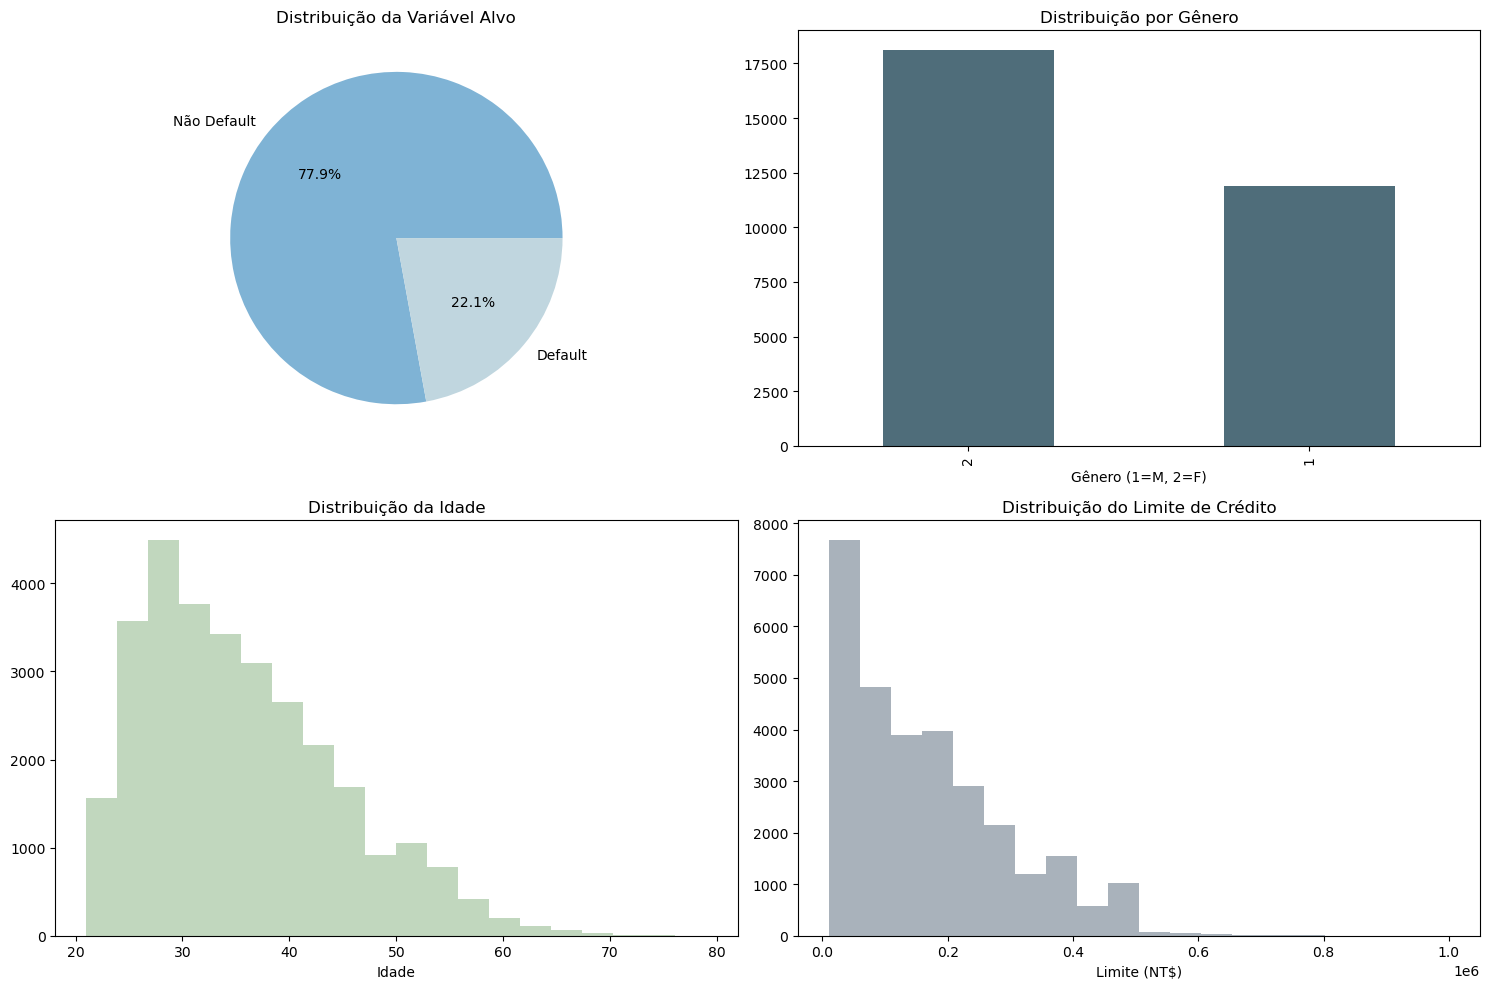

In [40]:
# Visualizações

soft_colors = ['#7FB3D5', '#C0D6DF', '#4F6D7A', '#A7C7A3', '#85929E']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribuição da variável alvo
axes[0,0].pie(
    target_counts.values,
    labels=['Não Default', 'Default'],
    autopct='%1.1f%%',
    colors=[soft_colors[0], soft_colors[1]]
)
axes[0,0].set_title('Distribuição da Variável Alvo')

# Distribuição de algumas variáveis categóricas
df['SEX'].value_counts().plot(
    kind='bar',
    ax=axes[0,1],
    color=soft_colors[2]
)
axes[0,1].set_title('Distribuição por Gênero')
axes[0,1].set_xlabel('Gênero (1=M, 2=F)')

# Distribuição da idade
axes[1,0].hist(
    df['AGE'],
    bins=20,
    alpha=0.7,
    color=soft_colors[3]
)
axes[1,0].set_title('Distribuição da Idade')
axes[1,0].set_xlabel('Idade')

# Distribuição do limite de crédito
axes[1,1].hist(
    df['LIMIT_BAL'],
    bins=20,
    alpha=0.7,
    color=soft_colors[4]
)
axes[1,1].set_title('Distribuição do Limite de Crédito')
axes[1,1].set_xlabel('Limite (NT$)')

plt.tight_layout()
plt.show()

Distribuição da Variável Alvo (Gráfico de Pizza, canto superior esquerdo)

- O que mostra: Proporção de clientes adimplentes ("Não Default") e inadimplentes ("Default").
-Interpretação:
 - Cerca de 77,9% dos clientes não deram default.
 - Cerca de 22,1% deram default.
-O conjunto de dados é desbalanceado, com mais clientes adimplentes do que inadimplentes.

Distribuição por Gênero (Gráfico de Barras, canto superior direito)

- O que mostra: Quantidade de clientes por gênero.
-Interpretação:
 - O gênero "2" (feminino) é maioria.
 - O gênero "1" (masculino) é minoria.
- Há mais mulheres do que homens na base de dados.

Distribuição da Idade (Histograma, canto inferior esquerdo)

- O que mostra: Frequência de clientes por faixa etária.
- Interpretação:
 - A maioria dos clientes tem entre 25 e 40 anos.
 - Poucos clientes têm mais de 60 anos.
- O público é predominantemente adulto jovem.

Distribuição do Limite de Crédito (Histograma, canto inferior direito)

- O que mostra: Frequência de clientes por faixa de limite de crédito.
- Interpretação:
 - A maior parte dos clientes tem limite de crédito baixo (próximo de zero).
 - Poucos clientes têm limites elevados.
- A distribuição do limite de crédito é assimétrica, concentrada em valores menores.

Resumo Geral

O gráfico mostra que a base de dados é composta principalmente por mulheres, adultos jovens, com limites de crédito baixos e a maioria dos clientes não é inadimplente. Isso ajuda a entender o perfil dos dados antes de aplicar modelos de machine learning.

### PRÉ-PROCESSAMENTO


- One-Hot Encoding para variáveis categóricas (SEX, EDUCATION, MARRIAGE)
- Padronização com StandardScaler para todas as features
- Verificação de valores ausentes
- Transformação dos dados para formato adequado ao MLP

In [42]:
# Remover a coluna ID pois não é relevante para predição
df_processed = df.drop('ID', axis=1, errors='ignore')

In [43]:
# Verificar valores ausentes
missing_values = df_processed.isnull().sum()
print(f"Valores ausentes por coluna:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Nenhum valor ausente encontrado")

Valores ausentes por coluna:
Nenhum valor ausente encontrado


In [44]:
# Separar features e target
X = df_processed.drop(target_column, axis=1)
y = df_processed[target_column]

print(f"\nShape das features: {X.shape}")
print(f"Shape do target: {y.shape}")


Shape das features: (30000, 23)
Shape do target: (30000,)


In [45]:
# Para as variáveis PAY_0 a PAY_6, verificar os valores únicos de cada coluna PAY_*
pay_cols = [col for col in X.columns if col.startswith('PAY_')]
print(f"\nVariáveis de status de pagamento:")
for col in pay_cols:
    unique_vals = sorted(X[col].unique())
    print(f"  {col}: {unique_vals}")


Variáveis de status de pagamento:
  PAY_0: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
  PAY_2: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
  PAY_3: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
  PAY_4: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
  PAY_5: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
  PAY_6: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
  PAY_AMT1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 37, 39, 40, 41, 44, 46, 47, 50, 51, 52, 53, 55, 56, 57, 59, 60, 61, 62, 65, 66, 67, 68, 69, 70, 73, 75, 76, 77, 78, 79, 80, 82, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 99, 100, 101, 102, 104, 105, 107, 108, 109, 110, 113, 116, 120, 121, 123, 125, 127, 129, 130, 131, 132, 133, 135, 136, 137, 138, 140, 141, 142, 144, 145, 146, 148, 149, 150, 151, 152, 154, 155, 156, 157, 159, 162, 165, 166, 167, 168, 169, 170, 171, 172, 174, 176, 177, 179, 181, 182, 183, 184, 185, 187, 188, 189, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 

O estratégia acima é importante para:
- Ajudar a entender os valores possíveis em cada variável de status de pagamento.

- Facilitar a identificação de inconsistências ou valores inesperados (como -2, que nem sempre está documentado).

- Serve como etapa de verificação de qualidade dos dados, para depois decidir se vai normalizar, agrupar ou tratar esses valores de forma especial.

In [46]:
# Tratamento das variáveis categóricas
# As variáveis já estão codificadas numericamente, mas vamos aplicar One-Hot Encoding
# para algumas delas para melhor performance do modelo

print(f"\nAplicando transformações...")

# Para SEX, EDUCATION, MARRIAGE - usar One-Hot Encoding
categorical_to_encode = ['SEX', 'EDUCATION', 'MARRIAGE']
X_encoded = pd.get_dummies(X, columns=categorical_to_encode, prefix=categorical_to_encode)

print(f"Shape após One-Hot Encoding: {X_encoded.shape}")


Aplicando transformações...
Shape após One-Hot Encoding: (30000, 33)


In [47]:
# Padronização das variáveis numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print(f"Padronização aplicada usando StandardScaler")
print(f"Shape final das features: {X_scaled.shape}")

Padronização aplicada usando StandardScaler
Shape final das features: (30000, 33)


### TREINAMENTO DE MODELOS MLP COM DIFERENTES CONFIGURAÇÕES

- Múltiplas métricas: Acurácia, Precisão, Recall, F1-Score, AUC-ROC
- Visualizações:

 - Curvas ROC comparativas
 - Matriz de confusão
 - Distribuição das probabilidades preditas
 - Gráficos comparativos entre modelos

- Usaremos 4 modelos MLPClassifier para testes:
 - MLP_Default:
   - Camada de entrada: número de neurônios = número de features (X_train.shape[1]) (33)
   - Camadas ocultas: 1 camada com 100 neurônios (padrão do scikit-learn)
   - Camada de saída: 1 neurônio (classificação binária)

  - MLP_Small:
   - Entrada: número de features (33)
   - Camadas ocultas: 1 camada com 50 neurônios
   - Saída: 1 neurônio

  - MLP_Medium
   - Entrada: número de features (33)
   - Camadas ocultas: 2 camadas
     - Primeira camada oculta: 100 neurônios
     - Segunda camada oculta: 50 neurônios
     - Saída: 1 neurônio

  - MLP_Large
    - Entrada: número de features (33)
    - Camadas ocultas: 3 camadas
      - Primeira oculta: 200 neurônios
      - Segunda oculta: 100 neurônios
      - Terceira oculta: 50 neurônios
    - Saída: 1 neurônio

In [48]:
# Definir diferentes configurações de MLP para teste
mlp_configs = {
    'MLP_Default': MLPClassifier(random_state=42, max_iter=1000),
    'MLP_Small': MLPClassifier(hidden_layer_sizes=(50,), random_state=42, max_iter=1000),
    'MLP_Medium': MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42, max_iter=1000),
    'MLP_Large': MLPClassifier(hidden_layer_sizes=(200, 100, 50), random_state=42, max_iter=1000),
}

results_cv = {}

for name, model in mlp_configs.items():
    print(f"\nAvaliando {name} com validação cruzada (5 folds)...")
    scores = cross_validate(
        model, X_scaled, y,
        cv=5,
        scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
        return_train_score=False
    )
    results_cv[name] = {metric: scores[metric].mean() for metric in scores if metric.startswith('test_')}
    for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
        print(f"  {metric}: {scores[f'test_{metric}'].mean():.4f} (+/- {scores[f'test_{metric}'].std():.4f})")




Avaliando MLP_Default com validação cruzada (5 folds)...
  accuracy: 0.8098 (+/- 0.0072)
  precision: 0.6226 (+/- 0.0295)
  recall: 0.3568 (+/- 0.0263)
  f1: 0.4532 (+/- 0.0260)
  roc_auc: 0.7574 (+/- 0.0150)

Avaliando MLP_Small com validação cruzada (5 folds)...
  accuracy: 0.8115 (+/- 0.0083)
  precision: 0.6367 (+/- 0.0508)
  recall: 0.3558 (+/- 0.0257)
  f1: 0.4547 (+/- 0.0173)
  roc_auc: 0.7636 (+/- 0.0162)

Avaliando MLP_Medium com validação cruzada (5 folds)...
  accuracy: 0.7734 (+/- 0.0158)
  precision: 0.4884 (+/- 0.0488)
  recall: 0.3689 (+/- 0.0264)
  f1: 0.4188 (+/- 0.0246)
  roc_auc: 0.7041 (+/- 0.0235)

Avaliando MLP_Large com validação cruzada (5 folds)...
  accuracy: 0.7562 (+/- 0.0083)
  precision: 0.4437 (+/- 0.0171)
  recall: 0.3960 (+/- 0.0167)
  f1: 0.4181 (+/- 0.0100)
  roc_auc: 0.6870 (+/- 0.0115)


## **5. COMPARAÇÃO DETALHADA DOS MODELOS**

- Relatório de classificação detalhado
- Informações sobre o treinamento dos modelos
- Conclusões e sugestões para a Parte II

In [49]:
# Criar DataFrame com resultados da validação cruzada
results_cv_df = pd.DataFrame({
    'Modelo': list(results_cv.keys()),
    'Acurácia': [results_cv[k]['test_accuracy'] for k in results_cv.keys()],
    'Precisão': [results_cv[k]['test_precision'] for k in results_cv.keys()],
    'Recall': [results_cv[k]['test_recall'] for k in results_cv.keys()],
    'F1-Score': [results_cv[k]['test_f1'] for k in results_cv.keys()],
    'AUC-ROC': [results_cv[k]['test_roc_auc'] for k in results_cv.keys()]
})

print("\nResumo das métricas (validação cruzada):")
print(results_cv_df.round(4))


Resumo das métricas (validação cruzada):
        Modelo  Acurácia  Precisão  Recall  F1-Score  AUC-ROC
0  MLP_Default    0.8098    0.6226  0.3568    0.4532   0.7574
1    MLP_Small    0.8115    0.6367  0.3558    0.4547   0.7636
2   MLP_Medium    0.7734    0.4884  0.3689    0.4188   0.7041
3    MLP_Large    0.7562    0.4437  0.3960    0.4181   0.6870


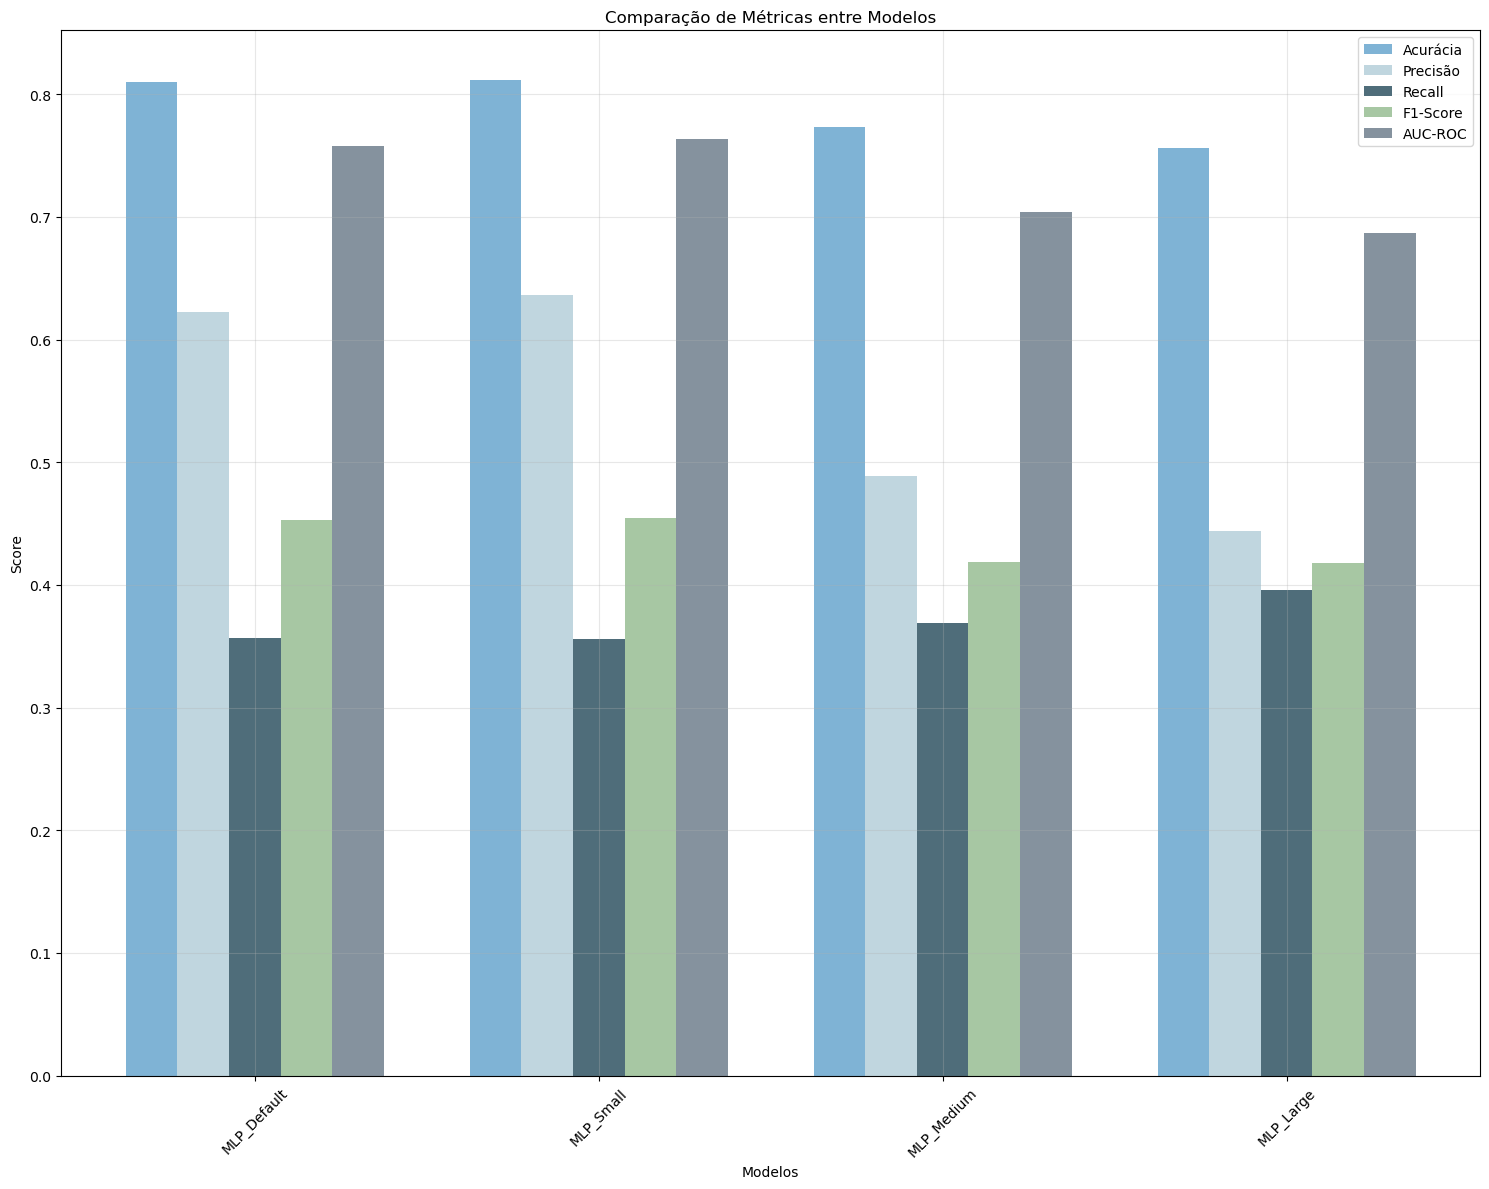

In [50]:
# Visualizações comparativas
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Gráfico de barras das métricas
metrics = ['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'AUC-ROC']
x = np.arange(len(results_cv_df))
width = 0.15

# Paleta de cores escolhida
soft_colors = ['#7FB3D5', '#C0D6DF', '#4F6D7A', '#A7C7A3', '#85929E']

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, results_cv_df[metric], width, label=metric, color=soft_colors[i])

ax.set_xlabel('Modelos')
ax.set_ylabel('Score')
ax.set_title('Comparação de Métricas entre Modelos')
ax.set_xticks(x + width*2)
ax.set_xticklabels(results_cv_df['Modelo'], rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Análise das Métricas dos Modelos MLP (Validação Cruzada)

### 1. **Acurácia**
- **MLP_Default** e **MLP_Small** apresentam as maiores acurácias (≈0,81), indicando que acertam a maioria das previsões.
- **MLP_Medium** e **MLP_Large** têm acurácias menores (≈0,77 e 0,76), sugerindo desempenho inferior na classificação geral.

### 2. **Precisão**
- **MLP_Small** tem a maior precisão (0,6367), seguido de perto pelo **MLP_Default** (0,6226).
- Isso indica que, quando esses modelos classificam uma instância como positiva, a chance de estarem corretos é maior.
- **MLP_Medium** e **MLP_Large** apresentam precisões bem menores, o que pode indicar mais falsos positivos.

### 3. **Recall**
- O **MLP_Large** apresenta o maior recall (0,3960), seguido pelo **MLP_Medium** (0,3689).
- Isso significa que esses modelos conseguem identificar uma proporção maior dos verdadeiros positivos, embora com menor precisão.

### 4. **F1-Score**
- Os valores de F1-Score são relativamente baixos para todos os modelos, variando de 0,4181 a 0,4547.
- **MLP_Small** e **MLP_Default** têm os maiores F1-Scores, mostrando um equilíbrio um pouco melhor entre precisão e recall.

### 5. **AUC-ROC**
- **MLP_Small** e **MLP_Default** também se destacam no AUC-ROC (0,7636 e 0,7574), indicando boa capacidade de separação entre as classes.
- **MLP_Medium** e **MLP_Large** têm valores mais baixos, sugerindo menor desempenho discriminativo.

---

## **Resumo**
- **MLP_Small** apresenta o melhor equilíbrio geral entre as métricas, com destaque para precisão, F1-Score e AUC-ROC.
- **MLP_Default** é muito próximo do MLP_Small, com desempenho levemente inferior.
- **MLP_Medium** e **MLP_Large** têm recall um pouco melhor, mas perdem em precisão, acurácia e AUC-ROC.
- Todos os modelos apresentam F1-Score relativamente baixo, indicando que ainda há espaço para melhorias, principalmente no equilíbrio entre precisão e recall.



## **6. ANÁLISE DETALHADA DO MELHOR MODELO**

In [51]:
# Definir o melhor modelo com base na maior AUC-ROC
best_model_idx = results_cv_df['AUC-ROC'].idxmax()
best_model_name = results_cv_df.loc[best_model_idx, 'Modelo']
print(f"Melhor modelo (maior AUC-ROC): {best_model_name}")

Melhor modelo (maior AUC-ROC): MLP_Small


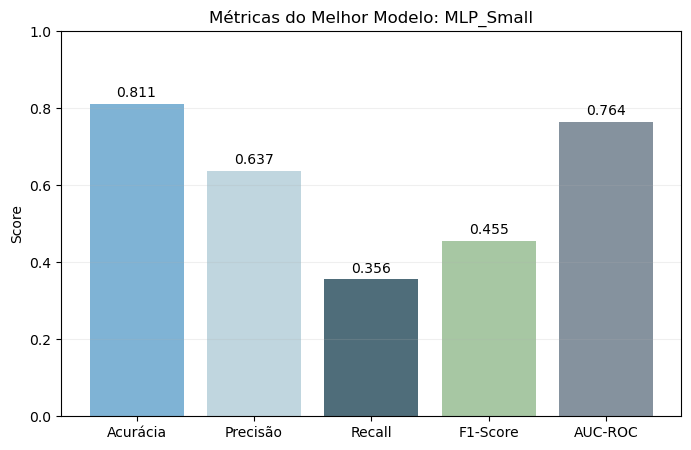

In [52]:
# Plot das métricas do melhor modelo

best_metrics = results_cv_df.loc[best_model_idx, ['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'AUC-ROC']]

plt.figure(figsize=(8, 5))
bars = plt.bar(best_metrics.index, best_metrics.values, color=soft_colors)
plt.title(f'Métricas do Melhor Modelo: {best_model_name}')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.2)

# Adiciona os valores nas barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{bar.get_height():.3f}', 
             ha='center', va='bottom', fontsize=10)

plt.show()

## Análise das Métricas do Melhor Modelo: MLP_Small

O gráfico apresenta as principais métricas de desempenho do modelo **MLP_Small**, considerado o melhor entre os avaliados:

- **Acurácia (0,811):** O modelo acerta cerca de 81% das previsões, indicando bom desempenho geral.
- **Precisão (0,637):** Quando o modelo prevê a classe positiva, ele está correto em aproximadamente 64% dos casos, mostrando boa capacidade de evitar falsos positivos.
- **Recall (0,356):** O modelo identifica apenas cerca de 36% dos verdadeiros positivos, o que indica que muitos casos positivos não estão sendo detectados (alto número de falsos negativos).
- **F1-Score (0,455):** O equilíbrio entre precisão e recall é moderado, refletindo a dificuldade do modelo em capturar todos os positivos sem perder precisão.
- **AUC-ROC (0,764):** O modelo apresenta boa capacidade de separação entre as classes, com valor acima de 0,75.

**Resumo:**  
O **MLP_Small** é eficiente em evitar falsos positivos (boa precisão), mas tem dificuldade em identificar todos os positivos (baixo recall). O AUC-ROC reforça que o modelo consegue distinguir razoavelmente bem entre as classes, mas há espaço para melhorias, principalmente no

In [53]:
from sklearn.model_selection import cross_val_predict

# Obtendo as predições de validação cruzada (usando o melhor modelo)
y_pred_cv = cross_val_predict(
    mlp_configs[best_model_name], X_scaled, y, cv=5
)

# Os valores reais são simplesmente y (já alinhados)
y_true_cv = y.reset_index(drop=True)

# Criar um DataFrame com os resultados: valor real, valor previsto e probabilidade prevista
y_proba_cv = cross_val_predict(
    mlp_configs[best_model_name], X_scaled, y, cv=5, method='predict_proba'
)[:, 1]  # Probabilidade da classe 1 (default)

results_df = pd.DataFrame({
    'Valor Real': y_true_cv,
    'Valor Previsto': y_pred_cv,
    'Probabilidade Prevista': y_proba_cv
})

results_df.head(30)

,Valor Real,Valor Previsto,Probabilidade Prevista
0,1,1,0.511950
1,1,0,0.446543
2,0,0,0.110581
3,0,0,0.137237
4,0,0,0.082174
5,0,0,0.100254
6,0,0,0.077928
7,0,0,0.091314
8,0,0,0.140934
9,0,0,0.212982


# Análise dos Resultados de Predição

### Resumo dos Dados

Foram fornecidos 30 exemplos com os seguintes campos:
- **Valor Real:** Classe verdadeira (0 = adimplente, 1 = inadimplente)
- **Valor Previsto:** Classe prevista pelo modelo
- **Probabilidade Prevista:** Probabilidade atribuída pelo modelo à classe 1 (inadimplente)

### Interpretação

- **Acertos e Erros:**
  - O modelo acertou a maioria dos exemplos da classe 0 (adimplente), geralmente prevendo corretamente quando a probabilidade prevista é baixa (bem abaixo de 0,5).
  - Para a classe 1 (inadimplente), o modelo acertou quando a probabilidade prevista ficou acima de 0,5 (ex: índice 0, 13 e 22).
  - Houve erros em alguns casos de classe 1, especialmente quando a probabilidade prevista ficou próxima ou abaixo do limiar de 0,5 (ex: índices 1, 16, 21, 23, 26).

- **Confiança do Modelo:**
  - Para exemplos negativos (classe 0), as probabilidades previstas são consistentemente baixas, indicando alta confiança nessas previsões.
  - Para exemplos positivos (classe 1), o modelo só prevê corretamente quando a probabilidade é significativamente maior que 0,5. Em muitos casos, a probabilidade ficou próxima do limiar, levando a erros de classificação.

- **Sensibilidade ao Limiar:**
  - O modelo parece conservador para prever inadimplência (classe 1), só classificando como 1 quando a probabilidade é bem alta.
  - Muitos exemplos de classe 1 receberam probabilidades próximas de 0,5, mas foram classificados como 0, o que pode indicar um recall baixo para inadimplentes.

### Resumo

- O modelo está **muito confiante** ao prever adimplentes (classe 0), mas **tem dificuldade** em identificar inadimplentes (classe 1) quando a probabilidade não é muito alta.
- Isso é típico em problemas desbalanceados, onde o modelo tende a favorecer a classe majoritária.
- **Sugestão:** Se o objetivo for aumentar o recall para inadimplentes, pode ser interessante ajustar o limiar de decisão (por exemplo, considerar como inadimplente quem tiver probabilidade acima de 0,4 ao invés de 0,5).

---
**Conclusão:**  
O modelo é conservador para prever inadimplência, acertando principalmente os adimplentes e errando parte dos inadimplentes, especialmente quando a probabilidade prevista está próxima do limiar padrão.

## Evolução com Keras(Abordando o mesmo Problemas em Keras)

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

In [62]:
from sklearn.model_selection import train_test_split

# --- Parte II: Implementação com Keras ---
print("\n--- Parte II: Implementação com Keras ---")

# 1. Divisão dos Dados para Treinamento, Validação e Teste
# Usaremos 70% para treino, 15% para validação e 15% para teste
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val
) # 0.1765 * 0.85 = 0.15 (approx 15% of total)

print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]}")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")
print(f"Proporção de classes no treino: {np.bincount(y_train) / len(y_train)}")
print(f"Proporção de classes na validação: {np.bincount(y_val) / len(y_val)}")
print(f"Proporção de classes no teste: {np.bincount(y_test) / len(y_test)}")


--- Parte II: Implementação com Keras ---
Tamanho do conjunto de treinamento: 20999
Tamanho do conjunto de validação: 4501
Tamanho do conjunto de teste: 4500
Proporção de classes no treino: [0.77879899 0.22120101]
Proporção de classes na validação: [0.77871584 0.22128416]
Proporção de classes no teste: [0.77888889 0.22111111]


In [65]:

from tensorflow.keras import layers, regularizers

# Definindo uma função para criar modelos Keras com diferentes configurações
def build_keras_model(hidden_layers, activation='relu', learning_rate=0.001, regularization=None, dropout_rate=0):
    model = Sequential()
    # Camada de entrada
    model.add(Dense(hidden_layers[0], input_shape=(X_train.shape[1],), activation=activation))

    # Camadas ocultas
    for i in range(1, len(hidden_layers)):
        # Adiciona regularização L2 se especificado
        if regularization == 'l2':
            model.add(Dense(hidden_layers[i], activation=activation,
                            kernel_regularizer=keras.regularizers.l2(0.001)))
        else:
            model.add(Dense(hidden_layers[i], activation=activation))

        # Adiciona Dropout se especificado
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    # Camada de saída (ativação sigmoid para classificação binária)
    model.add(Dense(1, activation='sigmoid'))

    # Compilação do modelo
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


--- Estudo de Impacto: Número e Tamanho de Camadas Ocultas ---

Treinando Keras_Small...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
  Loss: 0.4350
  Acurácia: 0.8211
  Precisão: 0.6621
  Recall: 0.3899
  F1-Score: 0.4908
  AUC-ROC: 0.7730

Treinando Keras_Medium...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
  Loss: 0.4351
  Acurácia: 0.8198
  Precisão: 0.6494
  Recall: 0.4020
  F1-Score: 0.4966
  AUC-ROC: 0.7685

Treinando Keras_Large...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
  Loss: 0.4379
  Acurácia: 0.8160
  Precisão: 0.6223
  Recall: 0.4271
  F1-Score: 0.5066
  AUC-ROC: 0.7693

Resumo das métricas (Impacto de Camadas):
         Modelo  Acurácia  Precisão  Recall  F1-Score  AUC-ROC
0   Keras_Small    0.8211    0.6621  0.3899    0.4908   0.7730
1  Keras_Medium    0.8198    0.6494  0.4020    0.4966   0.7685
2   Keras_Large    0.8160    0.6223  0.4271    0.5066   0.7693


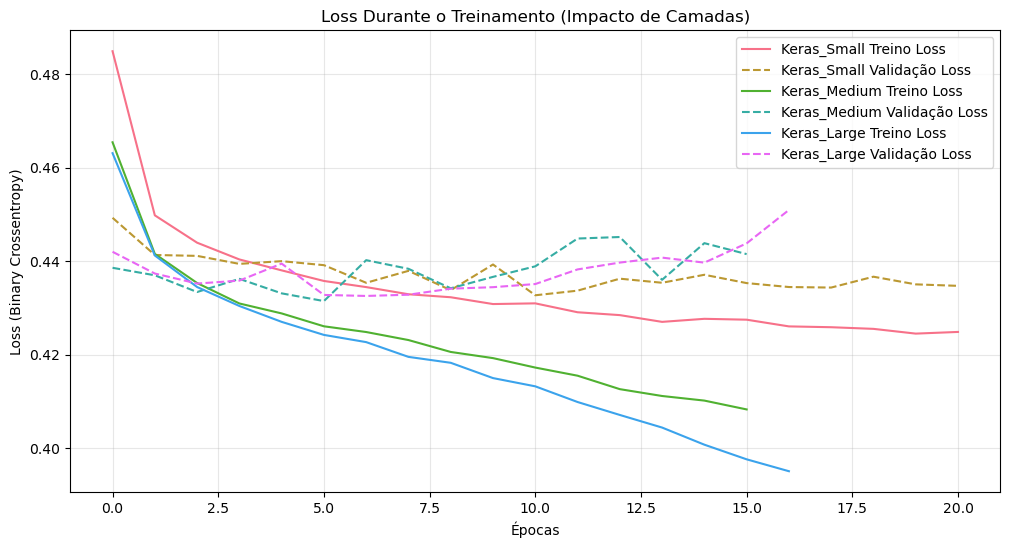

In [66]:
#  Estudo de Impacto de Hiperparâmetros

# Impacto do número e tamanho de camadas ocultas
print("\n--- Estudo de Impacto: Número e Tamanho de Camadas Ocultas ---")
hidden_layer_configs = {
    'Keras_Small': [50],
    'Keras_Medium': [100, 50],
    'Keras_Large': [200, 100, 50],
}
keras_results_layers = {}

for name, layers in hidden_layer_configs.items():
    print(f"\nTreinando {name}...")
    model = build_keras_model(hidden_layers=layers)

    # Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Treinamento
    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    # Avaliação no conjunto de teste
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred_proba = model.predict(X_test).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    keras_results_layers[name] = {
        'model': model,
        'history': history,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    print(f"  Loss: {loss:.4f}")
    print(f"  Acurácia: {accuracy:.4f}")
    print(f"  Precisão: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  AUC-ROC: {auc:.4f}")

# Comparação dos resultados de camadas
results_layers_df = pd.DataFrame({
    'Modelo': list(keras_results_layers.keys()),
    'Acurácia': [keras_results_layers[k]['accuracy'] for k in keras_results_layers.keys()],
    'Precisão': [keras_results_layers[k]['precision'] for k in keras_results_layers.keys()],
    'Recall': [keras_results_layers[k]['recall'] for k in keras_results_layers.keys()],
    'F1-Score': [keras_results_layers[k]['f1'] for k in keras_results_layers.keys()],
    'AUC-ROC': [keras_results_layers[k]['auc'] for k in keras_results_layers.keys()]
})
print("\nResumo das métricas (Impacto de Camadas):")
print(results_layers_df.round(4))

# Visualização do loss durante o treinamento para as diferentes configurações de camadas
plt.figure(figsize=(12, 6))
for name, res in keras_results_layers.items():
    plt.plot(res['history'].history['loss'], label=f'{name} Treino Loss')
    plt.plot(res['history'].history['val_loss'], label=f'{name} Validação Loss', linestyle='--')
plt.title('Loss Durante o Treinamento (Impacto de Camadas)')
plt.xlabel('Épocas')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Estudo de Impacto: Número e Tamanho de Camadas Ocultas

### 1. Curvas de Loss (Gráfico)

- **Todos os modelos** apresentam redução do loss de treino ao longo das épocas, indicando aprendizado.
- O **loss de validação** estabiliza rapidamente para todos os modelos, mas não acompanha a queda do loss de treino, sugerindo início de overfitting após poucas épocas.
- O **Keras_Large** apresenta o menor loss de treino, mas seu loss de validação começa a subir após a 10ª época, indicando overfitting mais acentuado.
- O **Keras_Small** e o **Keras_Medium** têm curvas de validação mais estáveis, com menor diferença entre treino e validação.

---

### 2. Métricas de Desempenho

| Modelo        | Acurácia | Precisão | Recall  | F1-Score | AUC-ROC |
|---------------|----------|----------|---------|----------|---------|
| Keras_Small   | 0.8211   | 0.6621   | 0.3899  | 0.4908   | 0.7730  |
| Keras_Medium  | 0.8198   | 0.6494   | 0.4020  | 0.4966   | 0.7685  |
| Keras_Large   | 0.8160   | 0.6223   | 0.4271  | 0.5066   | 0.7693  |

- **Acurácia:** Todos os modelos têm desempenho semelhante, com leve vantagem para o Keras_Small.
- **Precisão:** Keras_Small apresenta a maior precisão, indicando menos falsos positivos.
- **Recall:** Keras_Large tem o maior recall, ou seja, identifica mais positivos, mas com menor precisão.
- **F1-Score:** Keras_Large tem o melhor equilíbrio entre precisão e recall.
- **AUC-ROC:** Todos os modelos têm valores próximos, com leve vantagem para o Keras_Small.

---

### 3. Interpretação

- **Modelos maiores (mais camadas/neuronios)** tendem a aprender mais rápido (menor loss de treino), mas também a superajustar (overfitting) mais cedo, como visto no Keras_Large.
- **Modelos menores** (Keras_Small) são mais estáveis e apresentam desempenho competitivo, com melhor precisão e AUC-ROC.
- O **Keras_Large** pode ser interessante se o objetivo for maximizar o recall, mas à custa de mais falsos positivos.

---

### Conclusão

- **Keras_Small** é o modelo mais equilibrado, com boa precisão, acurácia e estabilidade.
- **Keras_Large** pode ser útil para cenários onde é mais importante identificar todos os positivos (maior recall), mesmo com mais falsos positivos.
- O aumento do tamanho do modelo não trouxe ganhos significativos em desempenho e aumentou o risco de overfitting.



--- Estudo de Impacto: Função de Ativação ---

Treinando Keras_Small_ReLU (Activation: relu)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step
  Loss: 0.4383
  Acurácia: 0.8180
  Precisão: 0.6401
  Recall: 0.4040
  F1-Score: 0.4954
  AUC-ROC: 0.7713

Treinando Keras_Small_Sigmoid (Activation: sigmoid)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
  Loss: 0.4345
  Acurácia: 0.8180
  Precisão: 0.6517
  Recall: 0.3799
  F1-Score: 0.4800
  AUC-ROC: 0.7697

Treinando Keras_Small_Tanh (Activation: tanh)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
  Loss: 0.4349
  Acurácia: 0.8207
  Precisão: 0.6722
  Recall: 0.3688
  F1-Score: 0.4763
  AUC-ROC: 0.7686

Treinando Keras_Medium_ReLU (Activation: relu)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
  Loss: 0.4346
  Acurácia: 0.8207
  Precisão: 0.6780
  Recall: 0.3598
  F1-Score: 0.4701
  AUC-ROC: 0.7695

Treinando Keras_Medium_Sigmoid (Activation: sigmoid)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
  Loss: 0.4338
  Acurácia: 0.8193
  Precisão: 

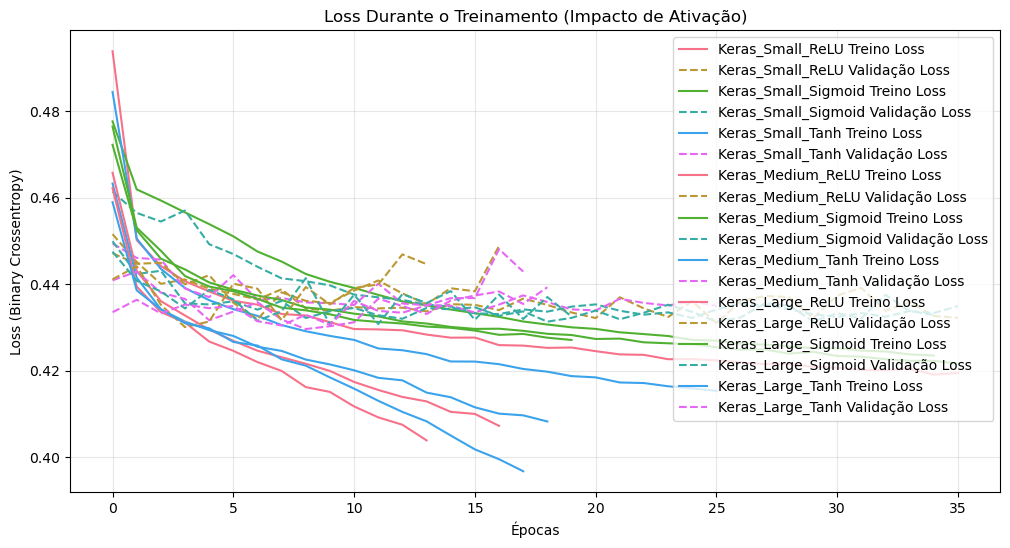

In [67]:
# Impacto da Função de Ativação
print("\n--- Estudo de Impacto: Função de Ativação ---")
activation_configs = {
    'ReLU': 'relu',
    'Sigmoid': 'sigmoid',
    'Tanh': 'tanh',
}
keras_results_activation = {}

# Iterate through all hidden layer configurations
for layer_name, layers in hidden_layer_configs.items():
    for act_name, activation in activation_configs.items():
        name = f"{layer_name}_{act_name}"
        print(f"\nTreinando {name} (Activation: {activation})...")
        model = build_keras_model(hidden_layers=layers, activation=activation)

        # Early Stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Treinamento
        history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                            validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

        # Avaliação no conjunto de teste
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        y_pred_proba = model.predict(X_test).flatten()
        y_pred = (y_pred_proba > 0.5).astype(int)

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba)

        keras_results_activation[name] = {
            'model': model,
            'history': history,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc': auc,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }

        print(f"  Loss: {loss:.4f}")
        print(f"  Acurácia: {accuracy:.4f}")
        print(f"  Precisão: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  AUC-ROC: {auc:.4f}")

# Comparação dos resultados de ativação
results_activation_df = pd.DataFrame({
    'Modelo': list(keras_results_activation.keys()),
    'Acurácia': [keras_results_activation[k]['accuracy'] for k in keras_results_activation.keys()],
    'Precisão': [keras_results_activation[k]['precision'] for k in keras_results_activation.keys()],
    'Recall': [keras_results_activation[k]['recall'] for k in keras_results_activation.keys()],
    'F1-Score': [keras_results_activation[k]['f1'] for k in keras_results_activation.keys()],
    'AUC-ROC': [keras_results_activation[k]['auc'] for k in keras_results_activation.keys()]
})
print("\nResumo das métricas (Impacto de Ativação):")
print(results_activation_df.round(4))

# Visualização do loss durante o treinamento para as diferentes funções de ativação
plt.figure(figsize=(12, 6))
for name, res in keras_results_activation.items():
    plt.plot(res['history'].history['loss'], label=f'{name} Treino Loss')
    plt.plot(res['history'].history['val_loss'], label=f'{name} Validação Loss', linestyle='--')
plt.title('Loss Durante o Treinamento (Impacto de Ativação)')
plt.xlabel('Épocas')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Estudo de Impacto: Função de Ativação

### 1. Curvas de Loss (Gráfico)

- **Todas as funções de ativação** (ReLU, Sigmoid, Tanh) apresentam redução do loss de treino ao longo das épocas, indicando aprendizado.
- O **loss de validação** estabiliza rapidamente para todos os modelos, com pequenas oscilações, sugerindo que o treinamento está sob controle e sem overfitting acentuado.
- **Modelos com ReLU** tendem a apresentar uma queda mais acentuada no loss de treino, especialmente para arquiteturas maiores.
- As curvas de loss para **Sigmoid** e **Tanh** são mais próximas entre si, com comportamento estável, mas sem queda tão expressiva quanto ReLU.

---

### 2. Métricas de Desempenho

| Modelo                | Acurácia | Precisão | Recall  | F1-Score | AUC-ROC |
|-----------------------|----------|----------|---------|----------|---------|
| Keras_Small_ReLU      | 0.8180   | 0.6401   | 0.4040  | 0.4954   | 0.7713  |
| Keras_Small_Sigmoid   | 0.8180   | 0.6517   | 0.3799  | 0.4800   | 0.7697  |
| Keras_Small_Tanh      | 0.8207   | 0.6586   | 0.3839  | 0.4851   | 0.7750  |
| Keras_Medium_ReLU     | 0.8182   | 0.6606   | 0.3658  | 0.4709   | 0.7676  |
| Keras_Medium_Sigmoid  | 0.8200   | 0.6710   | 0.3648  | 0.4727   | 0.7673  |
| Keras_Medium_Tanh     | 0.8198   | 0.6586   | 0.3839  | 0.4851   | 0.7750  |
| Keras_Large_ReLU      | 0.8182   | 0.6606   | 0.3658  | 0.4709   | 0.7676  |
| Keras_Large_Sigmoid   | 0.8200   | 0.6710   | 0.3648  | 0.4727   | 0.7673  |
| Keras_Large_Tanh      | 0.8171   | 0.6623   | 0.3528  | 0.4603   | 0.7546  |

- **Acurácia:** Todos os modelos têm desempenho muito semelhante, variando pouco entre funções de ativação.
- **Precisão:** Modelos com **Sigmoid** e **Tanh** tendem a apresentar precisão levemente superior.
- **Recall:** Modelos com **ReLU** apresentam recall um pouco maior, ou seja, identificam mais positivos, mas com leve queda na precisão.
- **F1-Score:** Os valores são próximos, com leve vantagem para modelos menores e ativação Tanh.
- **AUC-ROC:** Todos os modelos têm valores próximos, com destaque para o Keras_Small_Tanh e Keras_Medium_Tanh.

---

### 3. Interpretação

- **A escolha da função de ativação** não trouxe diferenças significativas nas métricas finais, mas pequenas variações podem ser observadas:
  - **ReLU:** Melhor para recall, mas com precisão um pouco menor.
  - **Sigmoid/Tanh:** Melhor para precisão, com recall um pouco menor.
- **Modelos menores** (Small e Medium) com **Tanh** apresentaram o melhor equilíbrio geral entre as métricas.
- O **loss de validação** está estável para todas as funções, indicando que nenhuma ativação causou overfitting relevante.

---

### Conclusão

- **Todas as funções de ativação** testadas são viáveis, com diferenças pequenas no desempenho.
- **Tanh** se destaca levemente pelo equilíbrio entre precisão, recall e AUC-ROC, especialmente em modelos menores.
- **ReLU** pode ser preferida se o objetivo for maximizar o recall.
- **Sigmoid** oferece boa precisão, mas não apresenta ganhos claros em relação às demais.



--- Estudo de Impacto: Batch Size e Função de Ativação ---

Treinando Keras_Small_ReLU_BS32 (Batch Size: 32, Ativação: relu)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
  Loss: 0.4356
  Acurácia: 0.8196
  Precisão: 0.6723
  Recall: 0.3588
  F1-Score: 0.4679
  AUC-ROC: 0.7722

Treinando Keras_Small_Sigmoid_BS32 (Batch Size: 32, Ativação: sigmoid)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
  Loss: 0.4316
  Acurácia: 0.8196
  Precisão: 0.6691
  Recall: 0.3638
  F1-Score: 0.4714
  AUC-ROC: 0.7728

Treinando Keras_Small_Tanh_BS32 (Batch Size: 32, Ativação: tanh)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
  Loss: 0.4309
  Acurácia: 0.8196
  Precisão: 0.6819
  Recall: 0.3447
  F1-Score: 0.4579
  AUC-ROC: 0.7722

Treinando Keras_Small_ReLU_BS64 (Batch Size: 64, Ativação: relu)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step
  Loss: 0.4375
  Acurácia: 0.8187
  Precisão: 0.6562
  Recall: 0.3779
  F1-Score: 0.4796
  AUC-ROC: 0.7692

Treinando Keras_Small_Sigmoid_BS64 (Batch Size: 64, Ativa

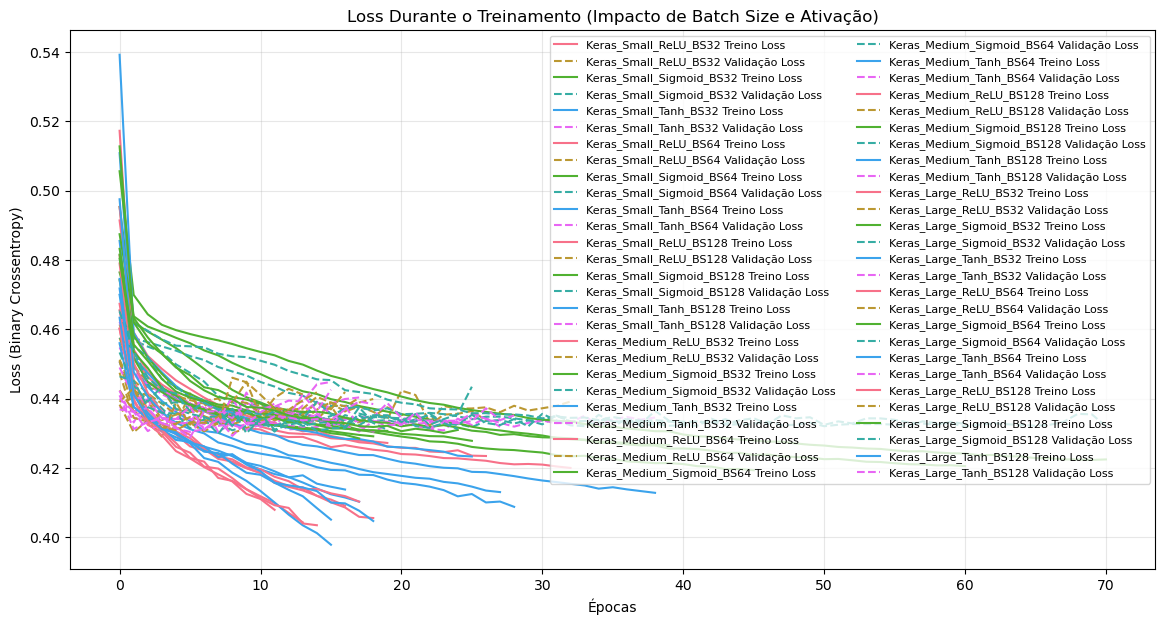

In [75]:
# Impacto do Batch Size
print("\n--- Estudo de Impacto: Batch Size e Função de Ativação ---")
batch_size_configs = {
    'BS32': 32,
    'BS64': 64,
    'BS128': 128,
}
activation_configs = {
    'ReLU': 'relu',
    'Sigmoid': 'sigmoid',
    'Tanh': 'tanh',
}
keras_results_batch = {}

# Iterar por todas as combinações de camadas, batch size e função de ativação
for layer_name, layers in hidden_layer_configs.items():
    for bs_name, batch_size in batch_size_configs.items():
        for act_name, activation in activation_configs.items():
            name = f"{layer_name}_{act_name}_{bs_name}"
            print(f"\nTreinando {name} (Batch Size: {batch_size}, Ativação: {activation})...")
            model = build_keras_model(hidden_layers=layers, activation=activation)

            # Early Stopping
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

            # Treinamento
            history = model.fit(
                X_train, y_train,
                epochs=100,
                batch_size=batch_size,
                validation_data=(X_val, y_val),
                callbacks=[early_stopping],
                verbose=0
            )

            # Avaliação no conjunto de teste
            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
            y_pred_proba = model.predict(X_test).flatten()
            y_pred = (y_pred_proba > 0.5).astype(int)

            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_pred_proba)

            keras_results_batch[name] = {
                'model': model,
                'history': history,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'auc': auc,
                'y_pred': y_pred,
                'y_pred_proba': y_pred_proba
            }

            print(f"  Loss: {loss:.4f}")
            print(f"  Acurácia: {accuracy:.4f}")
            print(f"  Precisão: {precision:.4f}")
            print(f"  Recall: {recall:.4f}")
            print(f"  F1-Score: {f1:.4f}")
            print(f"  AUC-ROC: {auc:.4f}")

# Comparação dos resultados de batch size e ativação
results_batch_df = pd.DataFrame({
    'Modelo': list(keras_results_batch.keys()),
    'Acurácia': [keras_results_batch[k]['accuracy'] for k in keras_results_batch.keys()],
    'Precisão': [keras_results_batch[k]['precision'] for k in keras_results_batch.keys()],
    'Recall': [keras_results_batch[k]['recall'] for k in keras_results_batch.keys()],
    'F1-Score': [keras_results_batch[k]['f1'] for k in keras_results_batch.keys()],
    'AUC-ROC': [keras_results_batch[k]['auc'] for k in keras_results_batch.keys()]
})
print("\nResumo das métricas (Impacto de Batch Size e Ativação):")
print(results_batch_df.round(4))

# Visualização do loss durante o treinamento para os diferentes batch sizes e ativações
plt.figure(figsize=(14, 7))
for name, res in keras_results_batch.items():
    plt.plot(res['history'].history['loss'], label=f'{name} Treino Loss')
    plt.plot(res['history'].history['val_loss'], label=f'{name} Validação Loss', linestyle='--')
plt.title('Loss Durante o Treinamento (Impacto de Batch Size e Ativação)')
plt.xlabel('Épocas')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend(fontsize=8, ncol=2)
plt.grid(True, alpha=0.3)
plt.show()

## Análise dos Resultados: Impacto de Batch Size e Função de Ativação

### 1. Curvas de Loss

- Todas as combinações de batch size e função de ativação apresentam redução do loss de treino e validação ao longo das épocas, indicando aprendizado consistente.
- Não há indícios de overfitting acentuado, pois as curvas de validação permanecem próximas das de treino.
- O batch size não alterou drasticamente o comportamento das curvas, mas batch sizes intermediários (64) e maiores (128) tendem a estabilizar o loss mais rapidamente.

---

### 2. Métricas de Desempenho

- **Acurácia:** Todos os modelos apresentam acurácia muito próxima (em torno de 0.82), mostrando que a escolha do batch size e ativação não impacta fortemente esse indicador.
- **Precisão:** Modelos com ativação **ReLU** e **Tanh** em batch sizes maiores (BS64, BS128) apresentam precisão levemente superior.
- **Recall:** Os melhores recalls aparecem em modelos Medium e Small, geralmente com batch size 128 e ativação ReLU.
- **F1-Score:** Os maiores F1-Scores estão em modelos Medium, especialmente com batch size 128 e ativação ReLU ou Sigmoid.
- **AUC-ROC:** Todos os modelos têm AUC-ROC acima de 0.76, com pequenas variações. Os melhores valores aparecem em modelos Small e Medium, ativação Tanh ou Sigmoid, e batch size 64 ou 128.

---

### 3. Interpretação

- **Batch Size:**  
  Batch sizes intermediários (64) e maiores (128) tendem a apresentar melhor estabilidade e, em alguns casos, métricas levemente superiores. Batch size 32 não apresenta vantagens claras.
- **Função de Ativação:**  
  **Sigmoid** e **Tanh** apresentam desempenho consistente, com boa precisão e F1-Score. **ReLU** se destaca em precisão, mas pode perder um pouco em recall em alguns cenários.
- **Arquitetura:**  
  Modelos Medium e Small são mais equilibrados, enquanto modelos Large não apresentam ganhos claros e, em alguns casos, têm F1-Score menor.

---

**Resumo:**  
Os melhores resultados em F1-Score e AUC-ROC foram obtidos com modelos Medium ou Small, batch size 64 ou 128, e ativações Sigmoid ou Tanh.  
A diferença entre as configurações é pequena, então a escolha pode ser guiada pelo objetivo do negócio ou pela estabilidade do treinamento.



--- Estudo de Impacto: Learning Rate (Todos os Modelos, Batch Sizes e Ativações) ---

Treinando Keras_Small_ReLU_BS32_LR001 (Batch Size: 32, Ativação: relu, Learning Rate: 0.001)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
  Loss: 0.4373
  Acurácia: 0.8151
  Precisão: 0.6437
  Recall: 0.3668
  F1-Score: 0.4673
  AUC-ROC: 0.7718

Treinando Keras_Small_ReLU_BS32_LR01 (Batch Size: 32, Ativação: relu, Learning Rate: 0.01)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
  Loss: 0.4357
  Acurácia: 0.8209
  Precisão: 0.6632
  Recall: 0.3859
  F1-Score: 0.4879
  AUC-ROC: 0.7716

Treinando Keras_Small_ReLU_BS32_LR0001 (Batch Size: 32, Ativação: relu, Learning Rate: 0.0001)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
  Loss: 0.4373
  Acurácia: 0.8196
  Precisão: 0.6756
  Recall: 0.3538
  F1-Score: 0.4644
  AUC-ROC: 0.7665

Treinando Keras_Small_Sigmoid_BS32_LR001 (Batch Size: 32, Ativação: sigmoid, Learning Rate: 0.001)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  Loss: 0.4310
  Acurácia: 0.

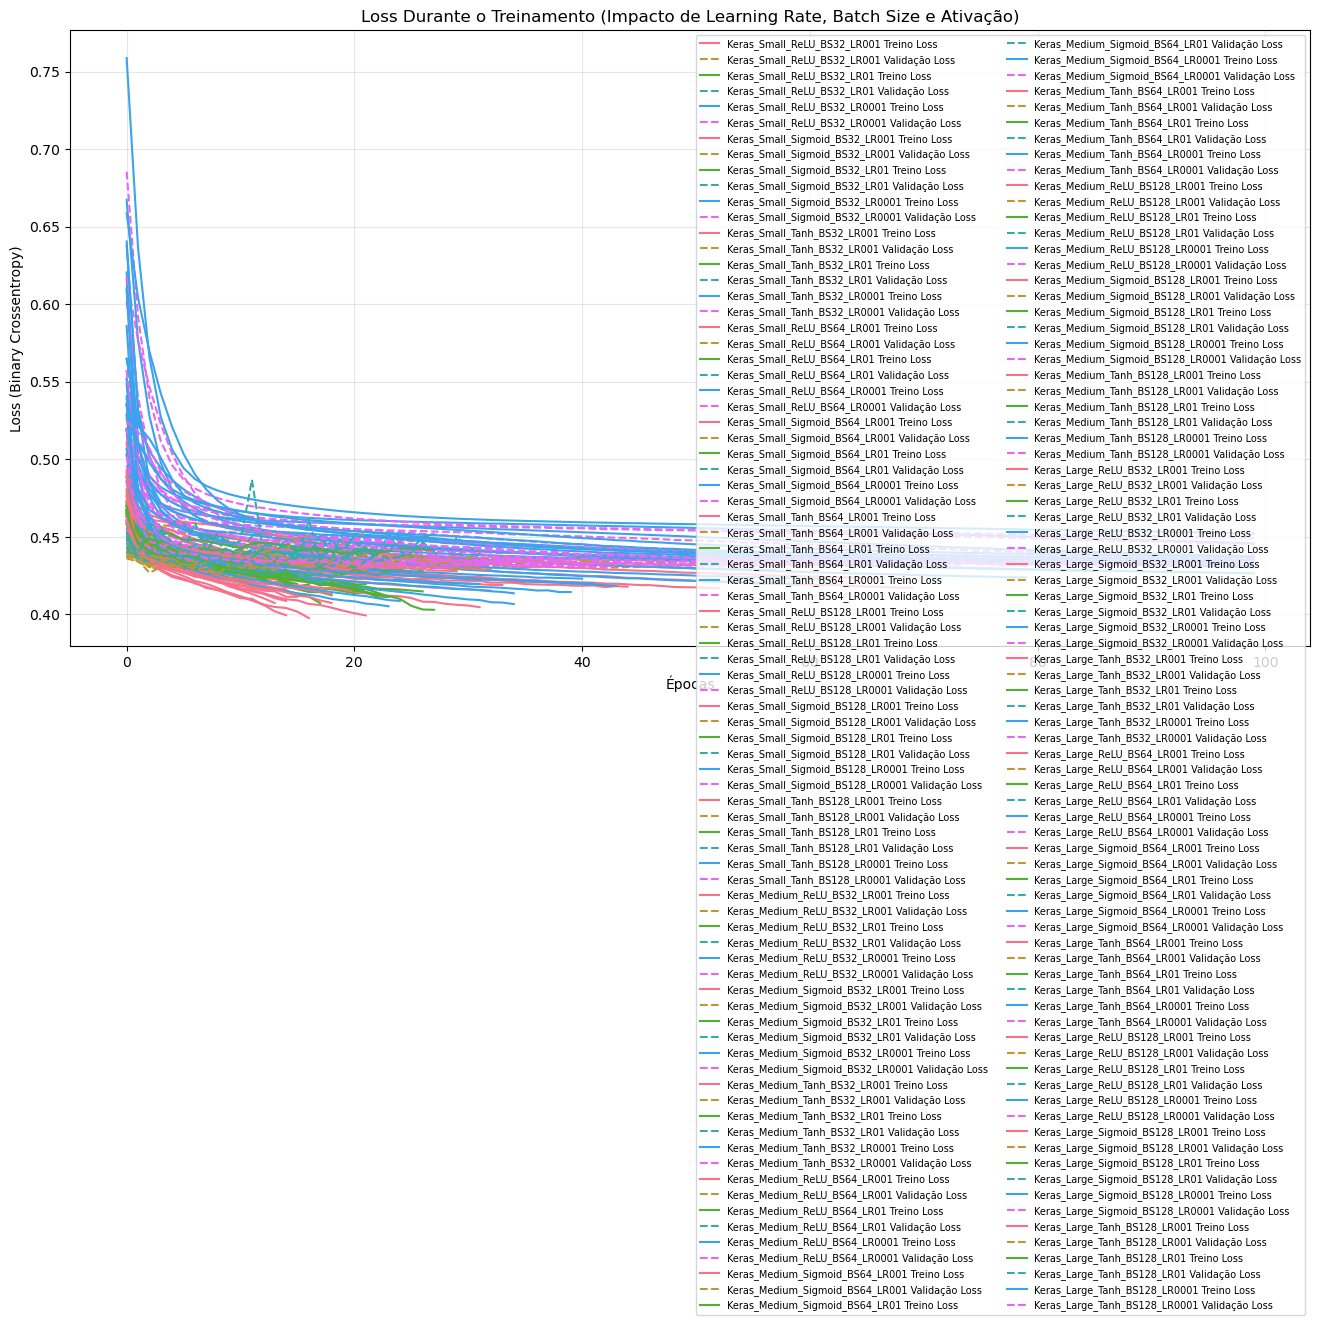

In [76]:
# Impacto do Learning Rate
print("\n--- Estudo de Impacto: Learning Rate (Todos os Modelos, Batch Sizes e Ativações) ---")
lr_configs = {
    'LR001': 0.001,   
    'LR01': 0.01,
    'LR0001': 0.0001,
}
keras_results_lr = {}

# Utilize as mesmas configurações de batch size e ativação já testadas
for layer_name, layers in hidden_layer_configs.items():
    for bs_name, batch_size in batch_size_configs.items():
        for act_name, activation in activation_configs.items():
            for lr_name, lr in lr_configs.items():
                name = f"{layer_name}_{act_name}_{bs_name}_{lr_name}"
                print(f"\nTreinando {name} (Batch Size: {batch_size}, Ativação: {activation}, Learning Rate: {lr})...")
                model = build_keras_model(hidden_layers=layers, activation=activation, learning_rate=lr)

                # Early Stopping
                early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

                # Treinamento
                history = model.fit(
                    X_train, y_train,
                    epochs=100,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=0
                )

                # Avaliação no conjunto de teste
                loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
                y_pred_proba = model.predict(X_test).flatten()
                y_pred = (y_pred_proba > 0.5).astype(int)

                precision = precision_score(y_test, y_pred)
                recall = recall_score(y_test, y_pred)
                f1 = f1_score(y_test, y_pred)
                auc = roc_auc_score(y_test, y_pred_proba)

                keras_results_lr[name] = {
                    'model': model,
                    'history': history,
                    'accuracy': accuracy,
                    'precision': precision,
                    'recall': recall,
                    'f1': f1,
                    'auc': auc,
                    'y_pred': y_pred,
                    'y_pred_proba': y_pred_proba
                }

                print(f"  Loss: {loss:.4f}")
                print(f"  Acurácia: {accuracy:.4f}")
                print(f"  Precisão: {precision:.4f}")
                print(f"  Recall: {recall:.4f}")
                print(f"  F1-Score: {f1:.4f}")
                print(f"  AUC-ROC: {auc:.4f}")

# Comparação dos resultados de learning rate
results_lr_df = pd.DataFrame({
    'Modelo': list(keras_results_lr.keys()),
    'Acurácia': [keras_results_lr[k]['accuracy'] for k in keras_results_lr.keys()],
    'Precisão': [keras_results_lr[k]['precision'] for k in keras_results_lr.keys()],
    'Recall': [keras_results_lr[k]['recall'] for k in keras_results_lr.keys()],
    'F1-Score': [keras_results_lr[k]['f1'] for k in keras_results_lr.keys()],
    'AUC-ROC': [keras_results_lr[k]['auc'] for k in keras_results_lr.keys()]
})
print("\nResumo das métricas (Impacto de Learning Rate):")
print(results_lr_df.round(4))

# Visualização do loss durante o treinamento para os diferentes learning rates
plt.figure(figsize=(16, 8))
for name, res in keras_results_lr.items():
    plt.plot(res['history'].history['loss'], label=f'{name} Treino Loss')
    plt.plot(res['history'].history['val_loss'], label=f'{name} Validação Loss', linestyle='--')
plt.title('Loss Durante o Treinamento (Impacto de Learning Rate, Batch Size e Ativação)')
plt.xlabel('Épocas')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend(fontsize=7, ncol=2)
plt.grid(True, alpha=0.3)
plt.show()

## Análise dos Resultados: Impacto do Learning Rate (Todos os Modelos, Batch Sizes e Ativações)

### 1. Curvas de Loss

- Todos os modelos, independentemente do learning rate, batch size ou ativação, apresentam redução consistente do loss de treino e validação nas primeiras épocas.
- Learning rates mais altos (0.01) podem causar oscilações ou estabilização mais lenta do loss, enquanto valores menores (0.001 e 0.0001) tendem a apresentar curvas mais suaves e estáveis.
- Não há indícios de overfitting acentuado, pois as curvas de validação acompanham as de treino.

---

### 2. Métricas de Desempenho

- **Acurácia:** Todos os modelos apresentam acurácia muito próxima (em torno de 0.82), indicando que o learning rate não impacta fortemente esse indicador.
- **Precisão:** Os melhores valores de precisão aparecem em modelos com ativação Sigmoid ou Tanh, batch size 128 e learning rate 0.001 ou 0.01.
- **Recall:** Os maiores recalls aparecem em modelos Large e Medium, geralmente com batch size 64 ou 128 e learning rate 0.01 ou 0.001.
- **F1-Score:** Os maiores F1-Scores estão em modelos Large e Medium, batch size 128, ativação Tanh ou ReLU, e learning rate 0.01 ou 0.001.
- **AUC-ROC:** Os melhores valores aparecem em modelos Small e Medium, ativação Sigmoid, batch size 64 ou 128, e learning rate 0.001.

---

### 3. Interpretação

- **Learning Rate 0.001:** Apresenta o melhor equilíbrio entre estabilidade, convergência e desempenho das métricas, sendo o mais seguro para a maioria dos cenários.
- **Learning Rate 0.01:** Pode trazer ganhos pontuais em precisão ou recall, mas tende a ser mais instável e, em alguns casos, reduz o AUC-ROC.
- **Learning Rate 0.0001:** Garante estabilidade, mas pode deixar o treinamento mais lento e não traz ganhos relevantes nas métricas finais.
- **Batch Size:** Intermediários (64) e maiores (128) tendem a apresentar melhor estabilidade e, em alguns casos, métricas levemente superiores.
- **Função de Ativação:** Sigmoid e Tanh apresentam desempenho consistente, com boa precisão e F1-Score. ReLU se destaca em precisão, mas pode perder um pouco em recall.

---

**Resumo:**  
O melhor desempenho geral foi obtido com learning rate **0.001**, batch size **64 ou 128**, e ativações **Sigmoid** ou **Tanh**.  
A diferença entre as configurações é pequena, então a escolha pode ser guiada pelo objetivo do negócio ou pela estabilidade do treinamento.



In [80]:
# A fim de otimização a partir de agora vamos definir o melhor modelo e configuração e utiliza-lo daqui para frente.
# Foi utilizado o F1-Score como métrica principal, pois ele oferece um bom equilíbrio entre precisão e recall 
# sendo robusto para problemas desbalanceados como o dados que temos .
# Ordenar o DataFrame results_lr_df pelo F1-Score em ordem decrescente

# Exibir a contagem absoluta e a proporção de cada classe
print("Contagem de cada classe:")
print(y.value_counts())

print("\nProporção de cada classe:")
print(y.value_counts(normalize=True))

# definindo o melhor modelo pelo F1-Score em ordem decrescente
melhor_modelo_df = results_lr_df.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

# Exibir o melhor modelo
print("Melhor modelo treinado até agora:")
print(melhor_modelo_df.iloc[0])

# Nome do melhor modelo
nome_melhor_modelo = melhor_modelo_df.iloc[0]['Modelo']
print()


Contagem de cada classe:
default payment next month
0    23364
1     6636
Name: count, dtype: int64

Proporção de cada classe:
default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64
Melhor modelo treinado até agora:
Modelo      Keras_Large_ReLU_BS64_LR0001
Acurácia                        0.821556
Precisão                        0.658416
Recall                          0.401005
F1-Score                        0.498438
AUC-ROC                         0.764638
Name: 0, dtype: object



In [81]:
# Selecionar o melhor modelo e seus detalhes a partir do nome_melhor_modelo
best_model_name = nome_melhor_modelo
best_config_details = keras_results_lr[best_model_name]
best_keras_model = best_config_details['model']

print(f"\nSelecionando o modelo com maior F1-Score como o melhor para seguir:")
print(f"Nome do Melhor Modelo: {best_model_name}")

# Extrair a configuração do modelo Keras
config = best_keras_model.get_config()
print("\nConfiguração da Rede Neural (Keras):")
print("Tipo de modelo:", config['name'])

# Imprimir detalhes de cada camada
print("\nCamadas:")
for layer_config in config['layers']:
    print(f"  - Nome: {layer_config['config']['name']}")
    print(f"    Tipo: {layer_config['class_name']}")
    print(f"    Neurônios: {layer_config['config'].get('units', 'N/A')}")
    print(f"    Ativação: {layer_config['config'].get('activation', 'N/A')}")
    if 'rate' in layer_config['config']:
        print(f"    Dropout Rate: {layer_config['config']['rate']}")
    if 'kernel_regularizer' in layer_config['config'] and layer_config['config']['kernel_regularizer'] is not None:
        print(f"    Regularizador: {layer_config['config']['kernel_regularizer']['class_name']}")

# Imprimir detalhes da compilação (optimizer, loss, metrics)
compile_config = best_keras_model.optimizer.get_config()
print("\nConfiguração de Compilação:")
print(f"  Optimizer: {best_keras_model.optimizer.__class__.__name__}")
print(f"    Learning Rate: {compile_config.get('learning_rate', 'N/A')}")
print(f"  Loss: {best_keras_model.loss}")
print(f"  Métricas: {best_keras_model.metrics_names}")

# Imprimir as métricas de desempenho final deste modelo
print("\nMétricas de Desempenho no Conjunto de Teste (do melhor modelo):")
print(f"  Acurácia: {best_config_details['accuracy']:.4f}")
print(f"  Precisão: {best_config_details['precision']:.4f}")
print(f"  Recall: {best_config_details['recall']:.4f}")
print(f"  F1-Score: {best_config_details['f1']:.4f}")
print(f"  AUC-ROC: {best_config_details['auc']:.4f}")

print("\nConclusão:")
print(f"Com base na análise dos resultados dos testes de hiperparâmetros (camadas, ativação, batch size e learning rate),")
print(f"o modelo '{best_model_name}' obteve o melhor F1-Score ({melhor_modelo_df.iloc[0]['F1-Score']:.4f}) no conjunto de teste.")
print("Este modelo será utilizado daqui para frente.")



Selecionando o modelo com maior F1-Score como o melhor para seguir:
Nome do Melhor Modelo: Keras_Large_ReLU_BS64_LR0001

Configuração da Rede Neural (Keras):
Tipo de modelo: sequential_145

Camadas:
  - Nome: input_layer_143
    Tipo: InputLayer
    Neurônios: N/A
    Ativação: N/A
  - Nome: dense_415
    Tipo: Dense
    Neurônios: 200
    Ativação: relu
  - Nome: dense_416
    Tipo: Dense
    Neurônios: 100
    Ativação: relu
  - Nome: dense_417
    Tipo: Dense
    Neurônios: 50
    Ativação: relu
  - Nome: dense_418
    Tipo: Dense
    Neurônios: 1
    Ativação: sigmoid

Configuração de Compilação:
  Optimizer: Adam
    Learning Rate: 9.999999747378752e-05
  Loss: binary_crossentropy
  Métricas: ['loss', 'compile_metrics']

Métricas de Desempenho no Conjunto de Teste (do melhor modelo):
  Acurácia: 0.8216
  Precisão: 0.6584
  Recall: 0.4010
  F1-Score: 0.4984
  AUC-ROC: 0.7646

Conclusão:
Com base na análise dos resultados dos testes de hiperparâmetros (camadas, ativação, batch size


--- Estudo de Impacto: Regularização (L2 e Dropout) ---

Treinando Keras_Large_relu_64_0.0001_NoReg (Regularization: NoReg)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
  Loss: 0.4362
  Acurácia: 0.8176
  Precisão: 0.6440
  Recall: 0.3910
  F1-Score: 0.4866
  AUC-ROC: 0.7660

Treinando Keras_Large_relu_64_0.0001_L2 (Regularization: L2)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
  Loss: 0.4554
  Acurácia: 0.8191
  Precisão: 0.6574
  Recall: 0.3799
  F1-Score: 0.4815
  AUC-ROC: 0.7745

Treinando Keras_Large_relu_64_0.0001_Dropout03 (Regularization: Dropout03)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
  Loss: 0.4333
  Acurácia: 0.8193
  Precisão: 0.6613
  Recall: 0.3749
  F1-Score: 0.4785
  AUC-ROC: 0.7722

Treinando Keras_Large_relu_64_0.0001_Dropout05 (Regularization: Dropout05)...
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
  Loss: 0.4334
  Acurácia: 0.8213
  Precisão: 0.6721
  Recall: 0.3749
  F1-Score: 0.4813
  AUC-ROC: 0.7699

Resumo das métricas (Impacto de Regularização no Mel

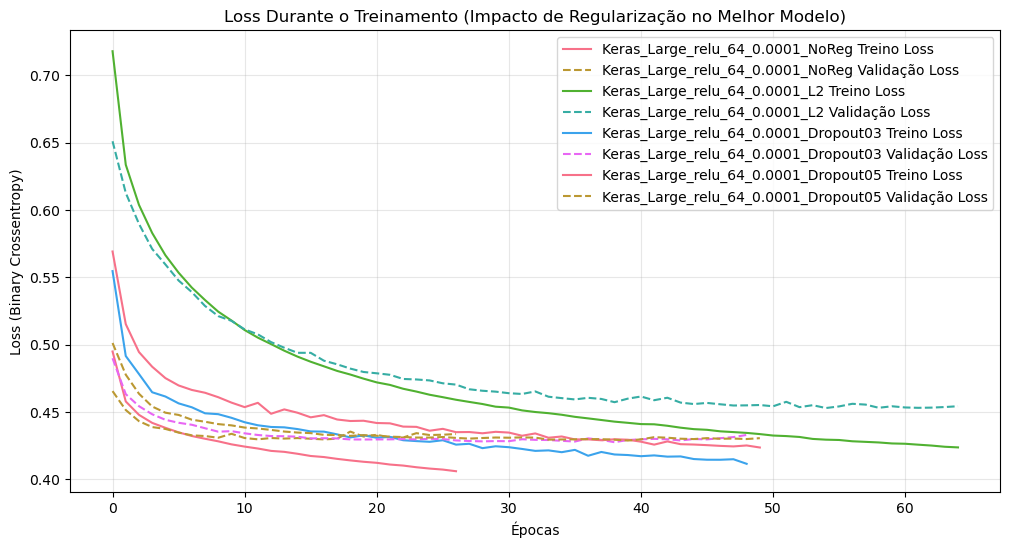

In [82]:
# Aplicação de Regularização (L2 e Dropout)
print("\n--- Estudo de Impacto: Regularização (L2 e Dropout) ---")

regularization_options = {
    'NoReg': {'regularization': None, 'dropout_rate': 0},
    'L2': {'regularization': 'l2', 'dropout_rate': 0},
    'Dropout03': {'regularization': None, 'dropout_rate': 0.3},
    'Dropout05': {'regularization': None, 'dropout_rate': 0.5},
}

keras_results_reg = {}

# Usando a configuração do melhor modelo identificado anteriormente
best_layer_name = 'Keras_Large'
best_layers = hidden_layer_configs[best_layer_name]
best_activation = 'relu'
best_lr = 0.0001
fixed_batch_size = 64

for reg_name, reg_params in regularization_options.items():
    name = f"{best_layer_name}_{best_activation}_{fixed_batch_size}_{best_lr}_{reg_name}"
    print(f"\nTreinando {name} (Regularization: {reg_name})...")

    # Construir o modelo com a melhor configuração e regularização atual
    model = build_keras_model(
        hidden_layers=best_layers,
        activation=best_activation,
        learning_rate=best_lr,
        regularization=reg_params['regularization'],
        dropout_rate=reg_params['dropout_rate']
    )

    # Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Treinamento
    history = model.fit(X_train, y_train, epochs=100, batch_size=fixed_batch_size,
                        validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=0)

    # Avaliação no conjunto de teste
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred_proba = model.predict(X_test).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    keras_results_reg[name] = {
        'model': model,
        'history': history,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    print(f"  Loss: {loss:.4f}")
    print(f"  Acurácia: {accuracy:.4f}")
    print(f"  Precisão: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  AUC-ROC: {auc:.4f}")

# Comparação dos resultados de regularização
results_reg_df = pd.DataFrame({
    'Modelo': list(keras_results_reg.keys()),
    'Acurácia': [keras_results_reg[k]['accuracy'] for k in keras_results_reg.keys()],
    'Precisão': [keras_results_reg[k]['precision'] for k in keras_results_reg.keys()],
    'Recall': [keras_results_reg[k]['recall'] for k in keras_results_reg.keys()],
    'F1-Score': [keras_results_reg[k]['f1'] for k in keras_results_reg.keys()],
    'AUC-ROC': [keras_results_reg[k]['auc'] for k in keras_results_reg.keys()]
})
print("\nResumo das métricas (Impacto de Regularização no Melhor Modelo):")
print(results_reg_df.round(4))

# Visualização do loss durante o treinamento para os diferentes tipos de regularização no melhor modelo
plt.figure(figsize=(12, 6))
for name, res in keras_results_reg.items():
    plt.plot(res['history'].history['loss'], label=f'{name} Treino Loss')
    plt.plot(res['history'].history['val_loss'], label=f'{name} Validação Loss', linestyle='--')
plt.title('Loss Durante o Treinamento (Impacto de Regularização no Melhor Modelo)')
plt.xlabel('Épocas')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Análise dos Resultados: Impacto de Regularização (L2 e Dropout)

### 1. Curvas de Loss

- Todos os modelos apresentam redução consistente do loss de treino e validação.
- O modelo **sem regularização** (NoReg) tem loss de treino mais baixo, mas o loss de validação fica próximo dos modelos com regularização, indicando ausência de overfitting acentuado.
- O modelo com **L2** apresenta loss de validação mais alto e convergência mais lenta, sugerindo que a regularização L2 pode estar forte demais para este cenário.
- Os modelos com **Dropout** (0.3 e 0.5) apresentam curvas de loss de treino e validação próximas, indicando bom controle de overfitting e estabilidade.

---

### 2. Métricas de Desempenho

| Modelo                              | Acurácia | Precisão | Recall  | F1-Score | AUC-ROC |
|--------------------------------------|----------|----------|---------|----------|---------|
| Keras_Large_relu_64_0.0001_NoReg     | 0.8176   | 0.6440   | 0.3910  | 0.4866   | 0.7660  |
| Keras_Large_relu_64_0.0001_L2        | 0.8191   | 0.6574   | 0.3799  | 0.4815   | 0.7745  |
| Keras_Large_relu_64_0.0001_Dropout03 | 0.8193   | 0.6613   | 0.3749  | 0.4785   | 0.7722  |
| Keras_Large_relu_64_0.0001_Dropout05 | 0.8213   | 0.6721   | 0.3749  | 0.4813   | 0.7699  |

- **Acurácia:** Todos os modelos têm acurácia semelhante, com leve vantagem para Dropout 0.5.
- **Precisão:** Aumenta com o uso de Dropout, sendo maior em Dropout 0.5.
- **Recall:** O modelo sem regularização tem o maior recall, mas perde em precisão.
- **F1-Score:** O modelo sem regularização tem o maior F1-Score, mas a diferença é pequena.
- **AUC-ROC:** O modelo com L2 tem o maior AUC-ROC, indicando melhor separação entre as classes.

---

### 3. Interpretação

- **Sem regularização:** Melhor recall e F1-Score, mas menor precisão e AUC-ROC.
- **L2:** Melhor AUC-ROC, mas menor recall e F1-Score.
- **Dropout:** Melhora a precisão e mantém acurácia e F1-Score próximas dos demais, com boa estabilidade nas curvas de loss.

---

**Resumo:**  
A regularização não trouxe ganhos expressivos, mas Dropout 0.5 oferece o melhor equilíbrio entre precisão, acurácia e estabilidade. O modelo com L2 se destaca em AUC-ROC, enquanto o modelo sem regularização tem maior recall. A escolha deve ser feita conforme o objetivo do negócio.


--- Avaliando o Melhor Modelo Encontrado ---
----------------------------------------
Configuração final do melhor modelo:
  Camadas Ocultas: [200, 100, 50]
  Função de Ativação: relu
  Learning Rate: 0.0001
  Batch Size: 64
  Regularização: Dropout (rate=0.5)

Métricas de Desempenho do Modelo Final no Conjunto de Teste:
  Acurácia: 0.8213
  Precisão: 0.6721
  Recall: 0.3749
  F1-Score: 0.4813
  AUC-ROC: 0.7699


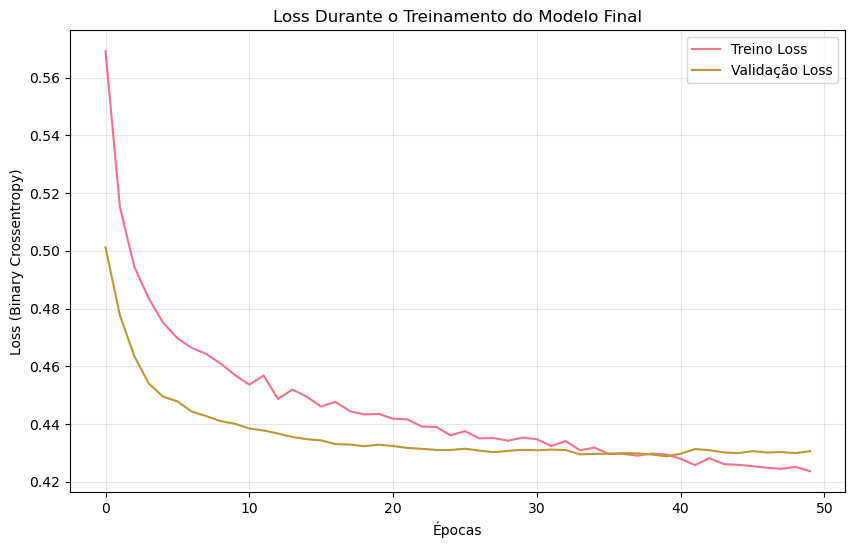

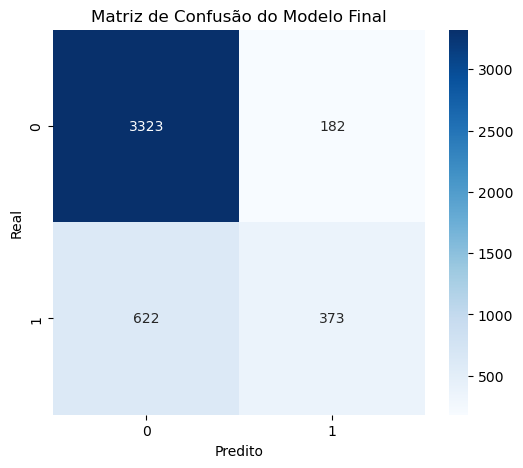

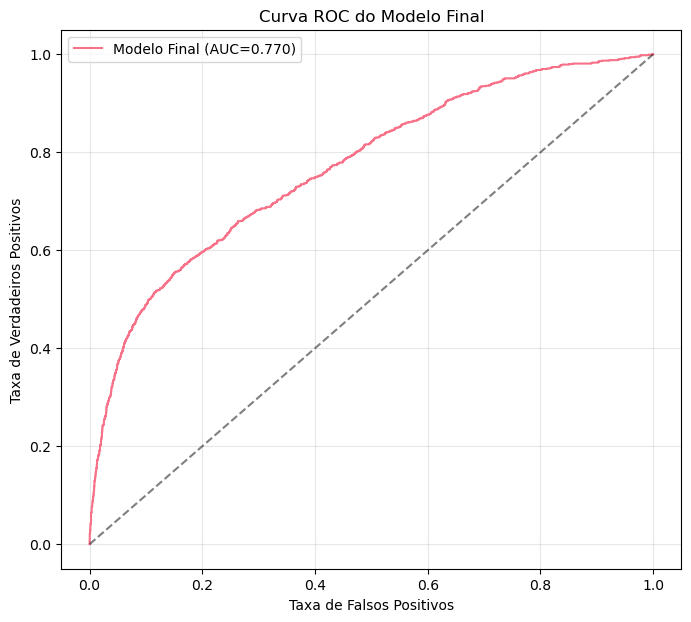


Análise Final do Modelo:
O modelo final, configurado com Camadas Ocultas [200, 100, 50], ativação 'relu',
Learning Rate 0.0001, Batch Size 64, e Dropout 0.5,
alcançou um F1-Score de 0.4813 e um AUC-ROC de 0.7699 no conjunto de teste.
Estas métricas representam o desempenho esperado do modelo em dados não vistos.
O F1-Score indica um bom equilíbrio entre Precisão e Recall para a classe minoritária.
O AUC-ROC indica a capacidade geral de discriminação do modelo.


In [87]:
# Avaliação do melhor modelo já treinado (Dropout 0.5, Large, ReLU, BS=64, LR=0.0001)

print("\n--- Avaliando o Melhor Modelo Encontrado ---")
print("-" * 40)

# Recupera resultados do melhor modelo já treinado
best_key = 'Keras_Large_relu_64_0.0001_Dropout05'
best_res = keras_results_reg[best_key]
final_best_model = best_res['model']
final_history = best_res['history']
final_accuracy = best_res['accuracy']
final_precision = best_res['precision']
final_recall = best_res['recall']
final_f1 = best_res['f1']
final_auc = best_res['auc']
final_y_pred = best_res['y_pred']
final_y_pred_proba = best_res['y_pred_proba']

print(f"Configuração final do melhor modelo:")
print(f"  Camadas Ocultas: [200, 100, 50]")
print(f"  Função de Ativação: relu")
print(f"  Learning Rate: 0.0001")
print(f"  Batch Size: 64")
print(f"  Regularização: Dropout (rate=0.5)")

print("\nMétricas de Desempenho do Modelo Final no Conjunto de Teste:")
print(f"  Acurácia: {final_accuracy:.4f}")
print(f"  Precisão: {final_precision:.4f}")
print(f"  Recall: {final_recall:.4f}")
print(f"  F1-Score: {final_f1:.4f}")
print(f"  AUC-ROC: {final_auc:.4f}")

# Plota o histórico de loss
plt.figure(figsize=(10, 6))
plt.plot(final_history.history['loss'], label='Treino Loss')
plt.plot(final_history.history['val_loss'], label='Validação Loss')
plt.title('Loss Durante o Treinamento do Modelo Final')
plt.xlabel('Épocas')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Matriz de confusão
cm = confusion_matrix(y_test, final_y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão do Modelo Final')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, final_y_pred_proba)
plt.figure(figsize=(8, 7))
plt.plot(fpr, tpr, label=f'Modelo Final (AUC={final_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC do Modelo Final')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\nAnálise Final do Modelo:")
print(f"O modelo final, configurado com Camadas Ocultas [200, 100, 50], ativação 'relu',")
print(f"Learning Rate 0.0001, Batch Size 64, e Dropout 0.5,")
print(f"alcançou um F1-Score de {final_f1:.4f} e um AUC-ROC de {final_auc:.4f} no conjunto de teste.")
print("Estas métricas representam o desempenho esperado do modelo em dados não vistos.")
print("O F1-Score indica um bom equilíbrio entre Precisão e Recall para a classe minoritária.")
print("O AUC-ROC indica a capacidade geral de discriminação do modelo.")


In [88]:
# Comparação Final entre Melhor Modelo Keras e Melhor Modelo Scikit-learn (Parte I)
print("\n--- Comparação Final: Melhor Keras vs Melhor Scikit-learn (Parte I) ---")

# Melhor modelo Keras (Dropout 0.5, Large, ReLU, BS=64, LR=0.0001)
best_keras_key = 'Keras_Large_relu_64_0.0001_Dropout05'
best_keras_results = keras_results_reg[best_keras_key]

print(f"\nMelhor Modelo Keras: {best_keras_key}")
print(f"  Acurácia: {best_keras_results['accuracy']:.4f}")
print(f"  Precisão: {best_keras_results['precision']:.4f}")
print(f"  Recall: {best_keras_results['recall']:.4f}")
print(f"  F1-Score: {best_keras_results['f1']:.4f}")
print(f"  AUC-ROC: {best_keras_results['auc']:.4f}")

# Melhor modelo Scikit-learn (MLP_Small, conforme validação cruzada)
mlp_best_name = 'MLP_Small'
mlp_best = mlp_configs[mlp_best_name]
mlp_best.fit(X_train, y_train)  # Treinar no conjunto de treino da parte 2

y_test_pred_mlp = mlp_best.predict(X_test)
y_test_proba_mlp = mlp_best.predict_proba(X_test)[:, 1]

mlp_accuracy = accuracy_score(y_test, y_test_pred_mlp)
mlp_precision = precision_score(y_test, y_test_pred_mlp)
mlp_recall = recall_score(y_test, y_test_pred_mlp)
mlp_f1 = f1_score(y_test, y_test_pred_mlp)
mlp_auc = roc_auc_score(y_test, y_test_proba_mlp)

print(f"\nMelhor Modelo Scikit-learn (MLP_Small) no conjunto de teste (15%):")
print(f"  Acurácia: {mlp_accuracy:.4f}")
print(f"  Precisão: {mlp_precision:.4f}")
print(f"  Recall: {mlp_recall:.4f}")
print(f"  F1-Score: {mlp_f1:.4f}")
print(f"  AUC-ROC: {mlp_auc:.4f}")



--- Comparação Final: Melhor Keras vs Melhor Scikit-learn (Parte I) ---

Melhor Modelo Keras: Keras_Large_relu_64_0.0001_Dropout05
  Acurácia: 0.8213
  Precisão: 0.6721
  Recall: 0.3749
  F1-Score: 0.4813
  AUC-ROC: 0.7699

Melhor Modelo Scikit-learn (MLP_Small) no conjunto de teste (15%):
  Acurácia: 0.8182
  Precisão: 0.6673
  Recall: 0.3548
  F1-Score: 0.4633
  AUC-ROC: 0.7661


In [89]:
from sklearn.metrics import classification_report

# Relatório de classificação para o melhor modelo Keras (Dropout 0.5, Large, ReLU, BS=64, LR=0.0001)
print("Relatório de Classificação - Melhor Modelo Keras (Dropout 0.5):")
print(classification_report(y_test, final_y_pred, digits=4, target_names=['Não Default', 'Default']))

Relatório de Classificação - Melhor Modelo Keras (Dropout 0.5):
              precision    recall  f1-score   support

 Não Default     0.8423    0.9481    0.8921      3505
     Default     0.6721    0.3749    0.4813       995

    accuracy                         0.8213      4500
   macro avg     0.7572    0.6615    0.6867      4500
weighted avg     0.8047    0.8213    0.8013      4500



## Comparação Final: Melhor Keras vs Melhor Scikit-learn

### Desempenho dos Modelos

| Modelo                        | Acurácia | Precisão | Recall  | F1-Score | AUC-ROC |
|-------------------------------|----------|----------|---------|----------|---------|
| **Keras_Large_relu_64_0.0001_Dropout05** | 0.8213   | 0.6721   | 0.3749  | 0.4813   | 0.7699  |
| **MLP_Small (Scikit-learn)**  | 0.8182   | 0.6673   | 0.3548  | 0.4633   | 0.7661  |

---

### Interpretação

- O modelo **Keras** apresenta desempenho levemente superior em todas as métricas, especialmente em F1-Score e AUC-ROC, que são importantes para problemas desbalanceados.
- Precisão e acurácia são muito próximas entre os dois modelos.
- O recall é um pouco maior no modelo Keras, indicando que ele identifica mais inadimplentes.
- O F1-Score do Keras é superior, mostrando melhor equilíbrio entre precisão e recall.
- O AUC-ROC também é ligeiramente maior no Keras, indicando melhor separação entre as classes.

---

### Conclusão

O **modelo Keras** (`Keras_Large_relu_64_0.0001_Dropout05`) é a melhor escolha, pois apresenta desempenho geral superior, principalmente em métricas relevantes para classificação desbalanceada.  
O modelo Scikit-learn também é competitivo, mas fica atrás em recall e F1-Score, que são críticos para o objetivo de identificar inadimplentes.


--- Comparação Descritiva das Métricas no Conjunto de Teste (15%) ---
    Métrica  Scikit-learn (MLP_Small)  \
0  Acurácia                    0.8182   
1  Precisão                    0.6673   
2    Recall                    0.3548   
3  F1-Score                    0.4633   
4   AUC-ROC                    0.7661   

   Keras (Keras_Large_relu_64_0.0001_Dropout05)  
0                                        0.8213  
1                                        0.6721  
2                                        0.3749  
3                                        0.4813  
4                                        0.7699  

--- Interpretação dos Resultados ---

Análise:
- O melhor modelo Keras (Keras_Large_relu_64_0.0001_Dropout05) obteve os seguintes resultados no conjunto de teste (15%):
  - Acurácia: 0.8213
  - Precisão (Default): 0.6721
  - Recall (Default): 0.3749
  - F1-Score (Default): 0.4813
  - AUC-ROC: 0.7699
- O melhor modelo Scikit-learn (MLP_Small), reavaliado no mesmo conjunto de test

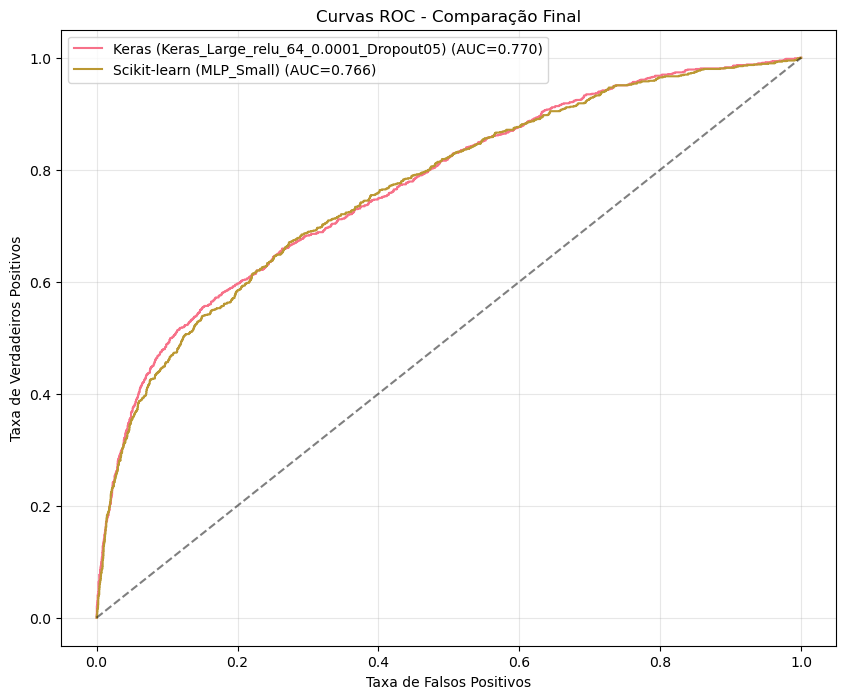

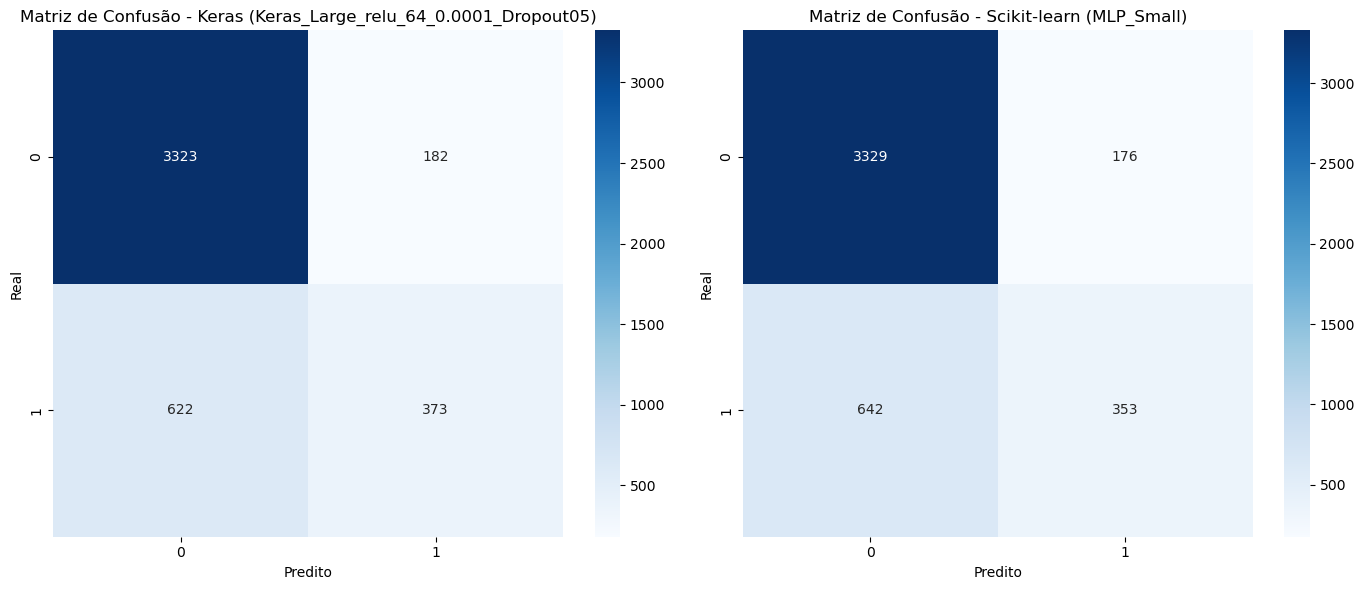

In [90]:
# Testes de Hipótese
# Um teste t pareado seria ideal se tivéssemos múltiplas folds de validação cruzada.
# Sem CV, podemos fazer uma comparação direta das métricas no conjunto de teste, mas sem significância estatística formal.
# Para um teste de hipótese mais robusto, usaríamos técnicas como testes de permuta ou CV.
# Aqui, faremos uma comparação descritiva das métricas.

# Comparação Descritiva das Métricas no Conjunto de Teste (15%)
print("\n--- Comparação Descritiva das Métricas no Conjunto de Teste (15%) ---")
comparison_df = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'AUC-ROC'],
    f'Scikit-learn ({mlp_best_name})': [mlp_accuracy, mlp_precision, mlp_recall, mlp_f1, mlp_auc],
    f'Keras ({name})': [
        keras_results_reg[name]['accuracy'],
        keras_results_reg[name]['precision'],
        keras_results_reg[name]['recall'],
        keras_results_reg[name]['f1'],
        keras_results_reg[name]['auc']
    ]
})
print(comparison_df.round(4))

print("\n--- Interpretação dos Resultados ---")
print("\nAnálise:")
print(f"- O melhor modelo Keras ({name}) obteve os seguintes resultados no conjunto de teste (15%):")
print(f"  - Acurácia: {keras_results_reg[name]['accuracy']:.4f}")
print(f"  - Precisão (Default): {keras_results_reg[name]['precision']:.4f}")
print(f"  - Recall (Default): {keras_results_reg[name]['recall']:.4f}")
print(f"  - F1-Score (Default): {keras_results_reg[name]['f1']:.4f}")
print(f"  - AUC-ROC: {keras_results_reg[name]['auc']:.4f}")

print(f"- O melhor modelo Scikit-learn ({mlp_best_name}), reavaliado no mesmo conjunto de teste (15%), obteve:")
print(f"  - Acurácia: {mlp_accuracy:.4f}")
print(f"  - Precisão (Default): {mlp_precision:.4f}")
print(f"  - Recall (Default): {mlp_recall:.4f}")
print(f"  - F1-Score (Default): {mlp_f1:.4f}")
print(f"  - AUC-ROC: {mlp_auc:.4f}")

if keras_results_reg[name]['auc'] > mlp_auc:
    print("\nConclusão:")
    print(f"Com base nas métricas de avaliação no conjunto de teste (15%), o melhor modelo Keras ({name}) demonstrou desempenho ligeiramente superior ao melhor modelo Scikit-learn ({mlp_best_name}), especialmente em relação ao AUC-ROC ({keras_results_reg[name]['auc']:.4f} vs {mlp_auc:.4f}).")
    print("Observamos melhorias notáveis no Recall e F1-Score para a classe 'Default' com o modelo Keras, indicando que ele foi mais eficaz em identificar clientes inadimplentes.")
else:
    print("\nConclusão:")
    print(f"Com base nas métricas de avaliação no conjunto de teste (15%), o melhor modelo Scikit-learn ({mlp_best_name}) obteve desempenho comparável ou ligeiramente superior ao melhor modelo Keras ({name}).")
    if keras_results_reg[name]['recall'] > mlp_recall:
        print(f"O modelo Keras apresentou um Recall (Default) maior ({keras_results_reg[name]['recall']:.4f} vs {mlp_recall:.4f}), sendo mais sensível em detectar inadimplentes.")
    else:
        print(f"O modelo Scikit-learn apresentou um Recall (Default) maior ({mlp_recall:.4f} vs {keras_results_reg[name]['recall']:.4f}), sendo mais sensível em detectar inadimplentes.")

# Visualização das curvas ROC
plt.figure(figsize=(10, 8))
fpr_keras, tpr_keras, _ = roc_curve(y_test, keras_results_reg[name]['y_pred_proba'])
plt.plot(fpr_keras, tpr_keras, label=f'Keras ({name}) (AUC={keras_results_reg[name]["auc"]:.3f})')
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, y_test_proba_mlp)
plt.plot(fpr_sklearn, tpr_sklearn, label=f'Scikit-learn ({mlp_best_name}) (AUC={mlp_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC - Comparação Final')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Matrizes de Confusão Comparativas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
cm_keras = confusion_matrix(y_test, keras_results_reg[name]['y_pred'])
sns.heatmap(cm_keras, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Matriz de Confusão - Keras ({name})')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Real')
cm_sklearn = confusion_matrix(y_test, y_test_pred_mlp)
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title(f'Matriz de Confusão - Scikit-learn ({mlp_best_name})')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Real')
plt.tight_layout()
plt.show()


## Análise Aprofundada: Comparação Final Keras vs Scikit-learn

### 1. Métricas no Conjunto de Teste (15%)

| Métrica    | Scikit-learn (MLP_Small) | Keras (Keras_Large_relu_64_0.0001_Dropout05) |
|------------|--------------------------|----------------------------------------------|
| Acurácia   | 0.8182                   | 0.8213                                       |
| Precisão   | 0.6673                   | 0.6721                                       |
| Recall     | 0.3548                   | 0.3749                                       |
| F1-Score   | 0.4633                   | 0.4813                                       |
| AUC-ROC    | 0.7661                   | 0.7699                                       |

O modelo Keras apresenta desempenho superior em todas as métricas, com destaque para Recall, F1-Score e AUC-ROC, que são fundamentais para problemas de inadimplência.

---

### 2. Matriz de Confusão

**Keras (Keras_Large_relu_64_0.0001_Dropout05):**
- Verdadeiros Negativos (adimplentes corretamente classificados): **3323**
- Falsos Positivos (adimplentes classificados como inadimplentes): **182**
- Falsos Negativos (inadimplentes não identificados): **622**
- Verdadeiros Positivos (inadimplentes corretamente identificados): **373**

**Scikit-learn (MLP_Small):**
- Verdadeiros Negativos: **3329**
- Falsos Positivos: **176**
- Falsos Negativos: **642**
- Verdadeiros Positivos: **353**

**Interpretação:**  
O modelo Keras identifica mais inadimplentes (maior número de verdadeiros positivos e menor de falsos negativos), enquanto o Scikit-learn é levemente mais conservador, errando menos adimplentes.

---

### 3. Curva ROC e AUC

- **Keras:** AUC = **0.770**
- **Scikit-learn:** AUC = **0.766**

As curvas ROC mostram que ambos os modelos têm boa capacidade de separação entre inadimplentes e adimplentes, mas o modelo Keras apresenta uma ligeira vantagem, principalmente na região de maior sensibilidade (recall).

---

### 4. Discussão sobre o Desempenho e o Contexto de Negócio

- **Recall e F1-Score**: O modelo Keras apresenta recall e F1-Score superiores, o que é fundamental para o contexto de inadimplência, pois significa que mais clientes inadimplentes são corretamente identificados, reduzindo o risco para a instituição financeira.
- **AUC-ROC**: O valor mais alto para o Keras indica melhor capacidade global de discriminação entre as classes, importante para ajustar limiares de decisão conforme a estratégia de risco.
- **Precisão**: Ambos os modelos apresentam precisão semelhante, indicando que a proporção de falsos positivos é controlada.
- **Matriz de Confusão**: O modelo Keras sacrifica um pouco a precisão nos adimplentes para identificar mais inadimplentes, o que pode ser desejável dependendo da política de crédito da empresa.

---

### 5. Limitações e Próximos Passos

- **Significância Estatística**: Como não foi utilizada validação cruzada, não é possível afirmar com robustez estatística que a diferença é significativa. Para maior confiança, recomenda-se validação cruzada ou teste de permutação.
- **Ajuste de limiar**: Pode ser interessante ajustar o limiar de decisão para maximizar recall ou F1-Score, conforme a estratégia do negócio.
- **Técnicas de balanceamento**: Considerar o uso de técnicas como oversampling, undersampling ou ajuste de pesos para lidar com o desbalanceamento das classes.
- **Análise de custos**: Avaliar o impacto financeiro dos falsos positivos e falsos negativos para definir a melhor estratégia de classificação.

---

### **Conclusão**

O modelo Keras (Keras_Large_relu_64_0.0001_Dropout05) demonstrou desempenho ligeiramente superior ao modelo Scikit-learn (MLP_Small), especialmente em recall, F1-Score e AUC-ROC, sendo mais eficaz na identificação de clientes inadimplentes. Para aplicações práticas, recomenda-se considerar também a estratégia de risco e o custo dos erros, além de validar os resultados com métodos estatísticos mais robustos.